# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19()
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('3349596c.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-06-03T0604Z data: 3349596c.pkl
    # 2020-05-30T0158Z data: 74ef0466.pkl
    # 2020-05-25T0106Z data: a7180674.pkl
    # 2020-05-18T1412Z data: 411d8cc3.pkl
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-06-03T06:03:00.931550Z   
1  2020-06-03T06:03:00.946302Z   
2  2020-06-03T06:03:00.957971Z   
3  2020-06-03T06:03:00.969944Z   
4  2020-06-03T06:03:00.980210Z   

                                        coordinates  \
0         {'latitude': '33.0', 'longitude': '65.0'}   
1   {'latitude': '41.1533', 'longitude': '20.1683'}   
2    {'latitude': '28.0339', 'longitude': '1.6596'}   
3    {'latitude': '42.5063', 'longitude': '1.5218'}   
4  {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 16509, 'deaths': 270, 'recovered...   
1  {'confirmed': 1164, 'deaths': 33, 'recovered': 0}   
2  {'confirmed': 9626, 'deaths': 667, 'recovered'...   
3   {'confirmed': 844, 'deaths': 51, 'recovered': 0}   
4     {'confirmed': 86, 'deaths': 4, 'recovered': 0}   

                                           timelines  
0  {'confirmed': {'latest': 16509, 'timeline': {'...  
1  {'confirmed': {'latest': 1164, 'timeline': {'2...  
2  {'confirmed': {'latest': 9626, 'timeline': {'2...  
3  {'confirmed': {'latest': 844, 'timeline': {'20...  
4  {'confirmed': {'latest': 86, 'timeline': {'202...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
128      11441     269       NaN                     0.342045   
129      11468     270       NaN                     0.235993   
130      11503     271       NaN                     0.305197   
131      11541     272       NaN                     0.330349   
132      11590     273       NaN                     0.424573   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
128                                        1206.934972                 
129                                         832.722079                 
130                                        1076.913104                 
131                                        1165.662374                 
132                                        1498.141865                 

     deaths_percentage_change  \
128                  0.371747   
129                  0.371747   
130                  0.370370   
131                  0.369004   
132                  0.367647   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
128                                        1311.740783           
129                                        1311.740783           
130                                        1306.882484           
131                                        1302.060039           
132                                        1297.273054           

     confirmed_new_cases  deaths_new_cases  
128                 39.0               1.0  
129                 27.0               1.0  
130                 35.0               1.0  
131                 38.0               1.0  
132                 49.0               1.0

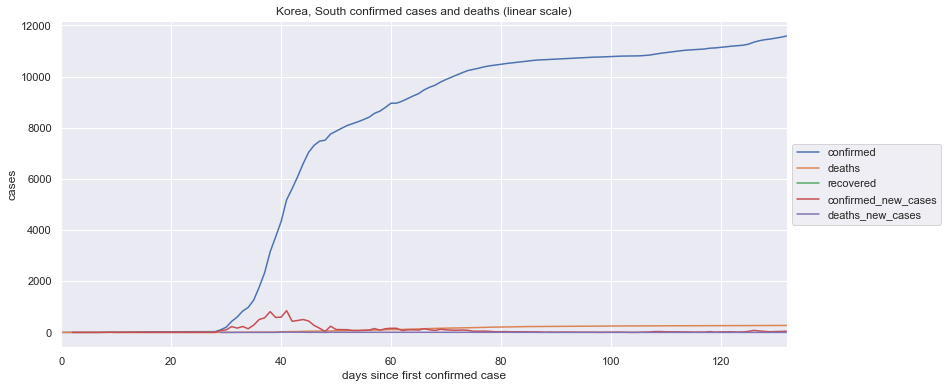

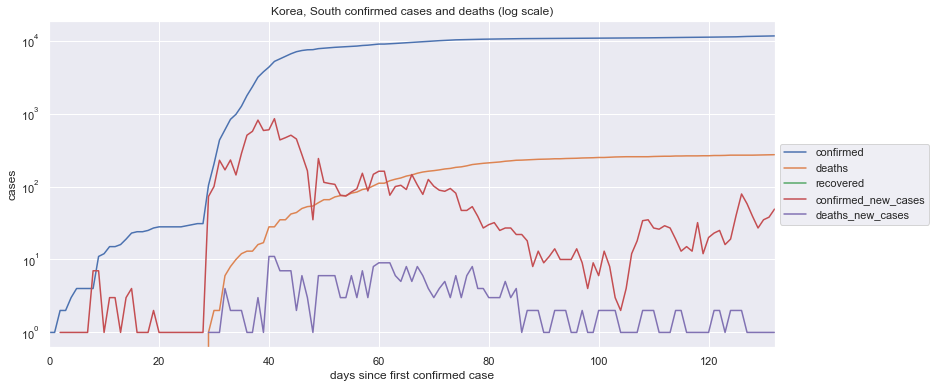

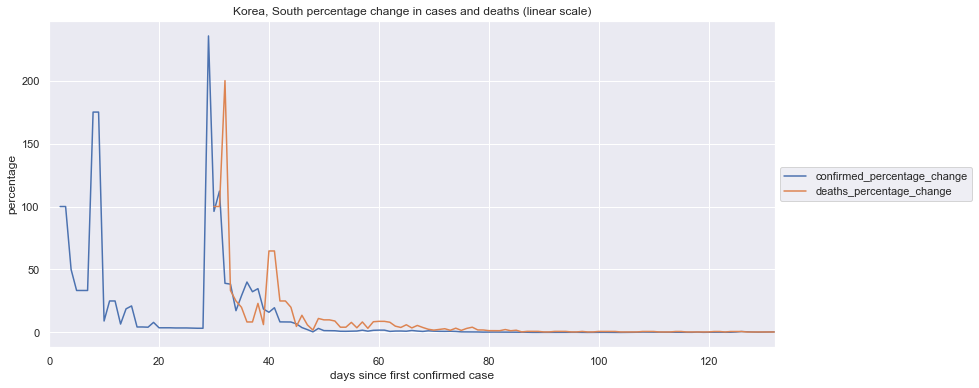

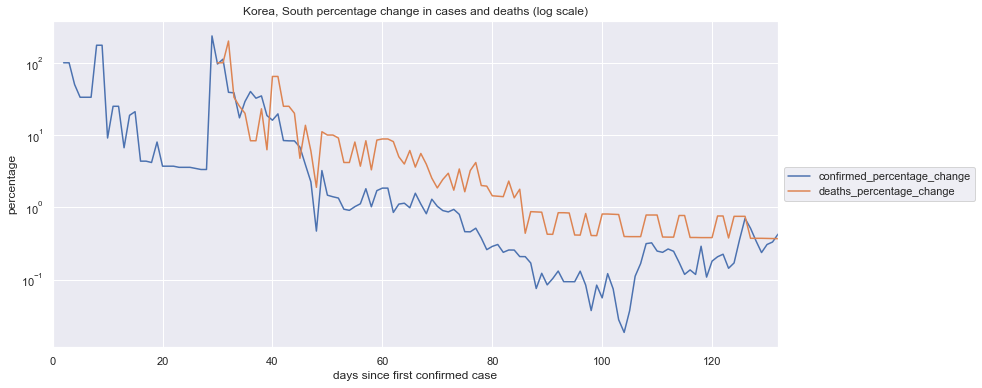

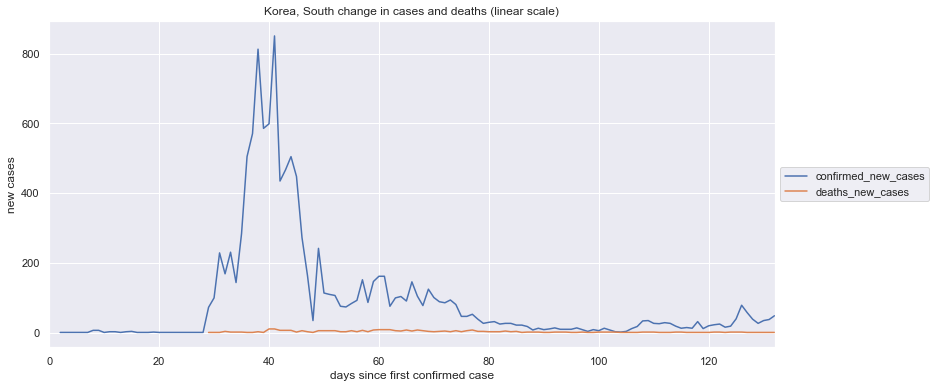

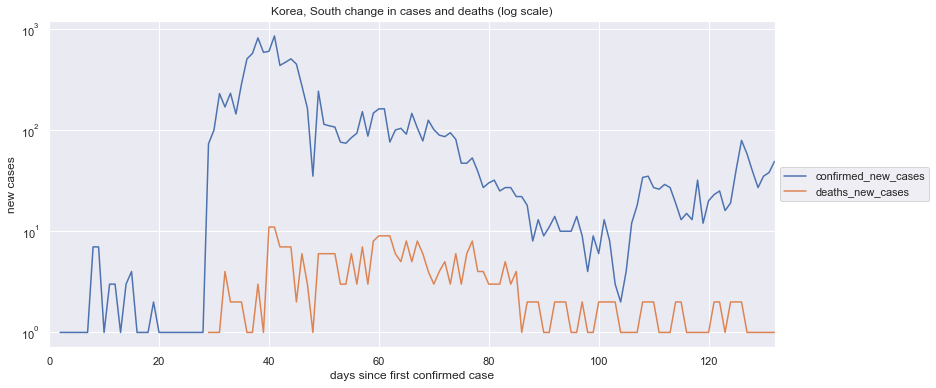

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths recovered  confirmed_percentage_change  \
115      58061    9430       NaN                     0.366471   
116      58186    9453       NaN                     0.215291   
117      58381    9467       NaN                     0.335132   
118      58517    9486       NaN                     0.232953   
119      58615    9505       NaN                     0.167473   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
115                                        3979.047889                 
116                                        2337.570203                 
117                                        3638.775567                 
118                                        2529.336084                 
119                                        1818.373878                 

     deaths_percentage_change  \
115                  0.447380   
116                  0.243902   
117                  0.148101   
118                  0.200697   
119                  0.200295   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
115                                        4857.528648           
116                                        2648.227581           
117                                        1608.042560           
118                                        2179.116178           
119                                        2174.751514           

     confirmed_new_cases  deaths_new_cases  
115                212.0              42.0  
116                125.0              23.0  
117                195.0              14.0  
118                136.0              19.0  
119                 98.0              19.0

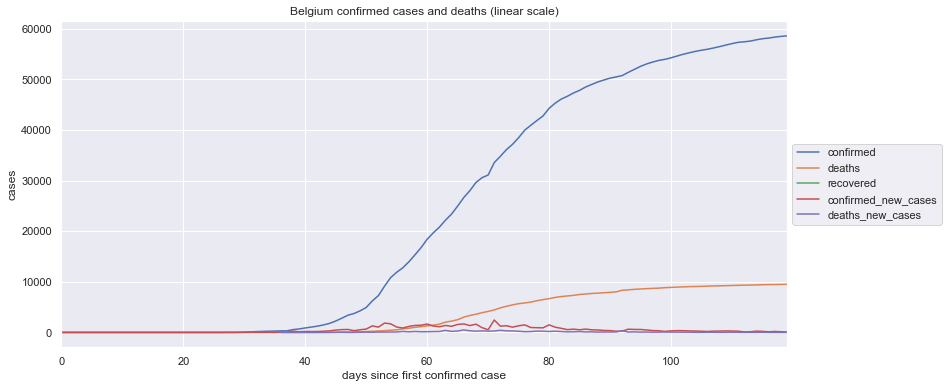

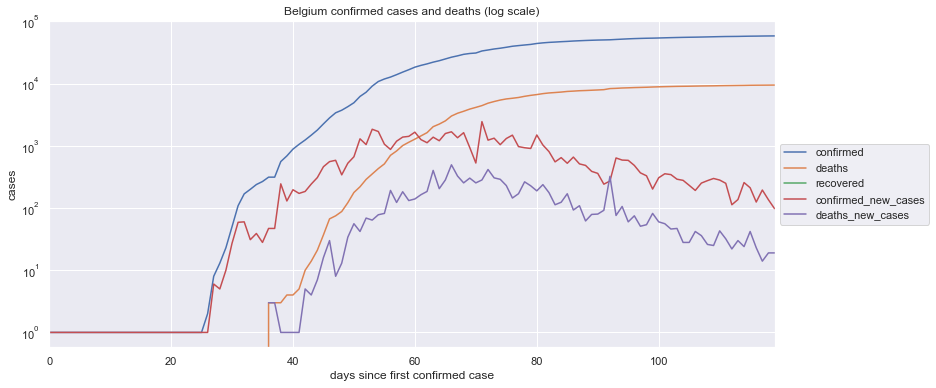

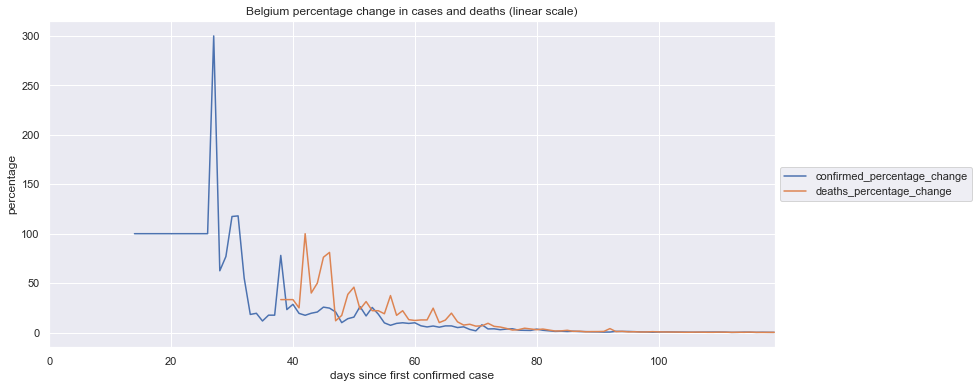

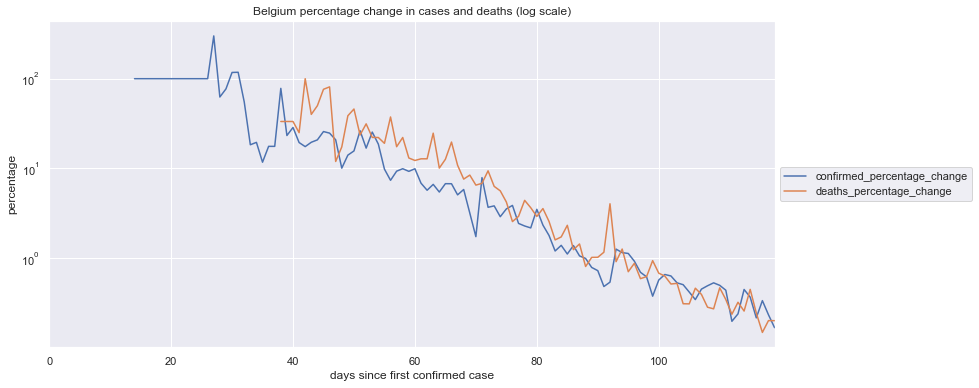

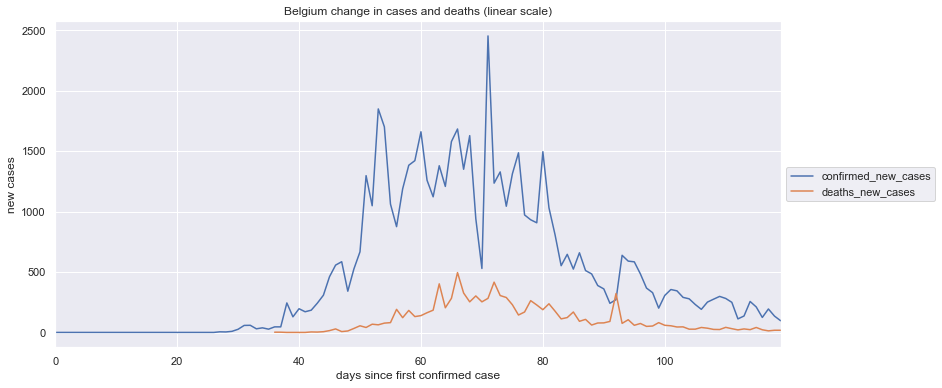

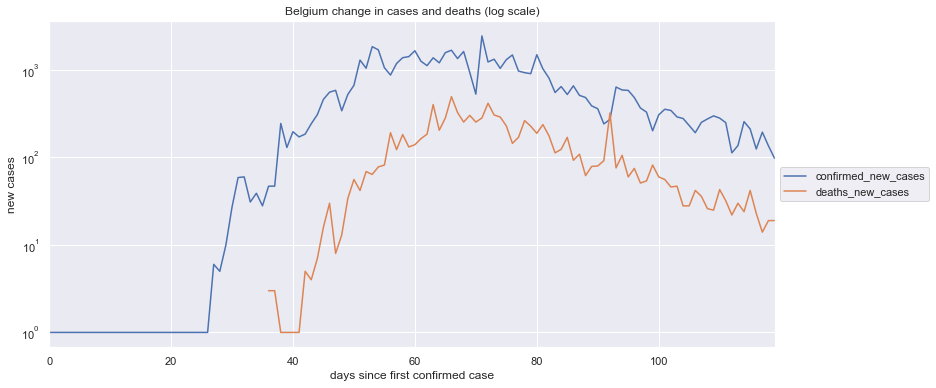

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
94      30828    1919       NaN                     0.103910   
95      30845    1919       NaN                     0.055145   
96      30862    1920       NaN                     0.055114   
97      30871    1920       NaN                     0.029162   
98      30874    1920       NaN                     0.009718   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
94                                         753.433656                 
95                                         399.846151                 
96                                         399.625779                 
97                                         211.450050                 
98                                          70.462801                 

    deaths_percentage_change  \
94                   0.10433   
95                   0.05211   
96                   0.05211   
97                       NaN   
98                       NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
94                                         756.479618           
95                                         377.845604           
96                                         377.845604           
97                                                NaN           
98                                                NaN           

    confirmed_new_cases  deaths_new_cases  
94                 32.0               2.0  
95                 17.0               1.0  
96                 17.0               1.0  
97                  9.0               NaN  
98                  3.0               NaN

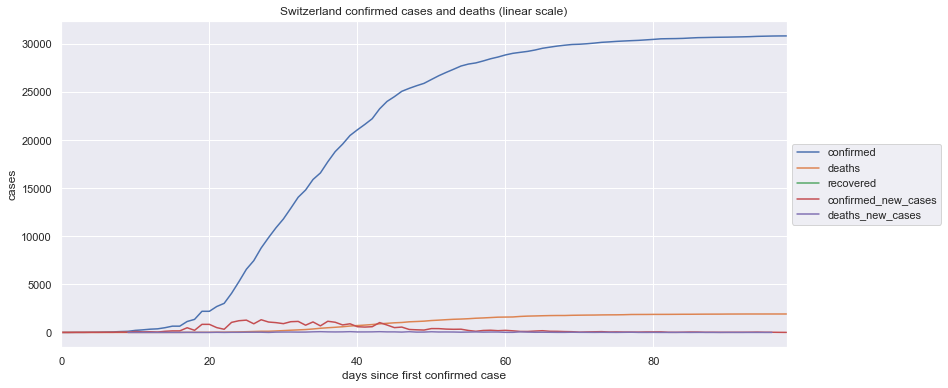

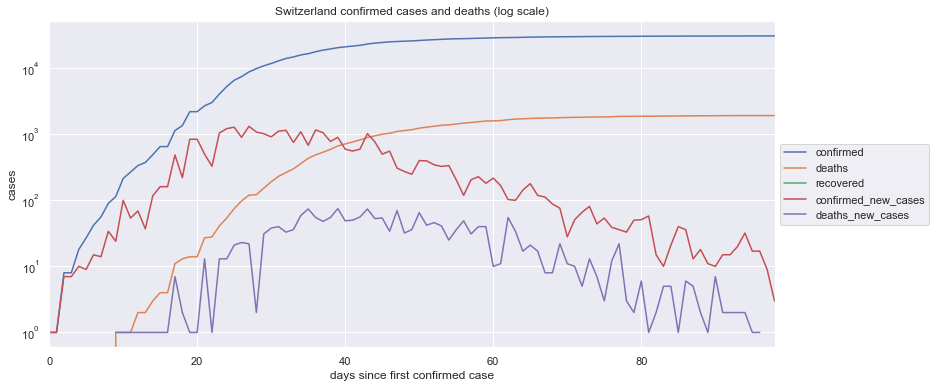

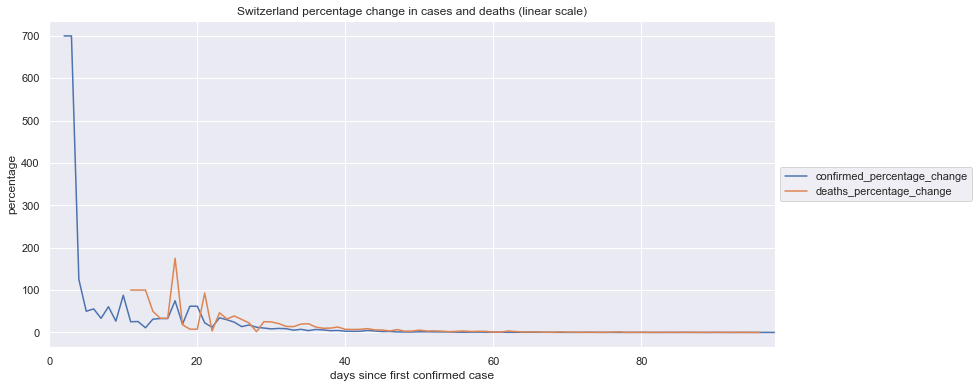

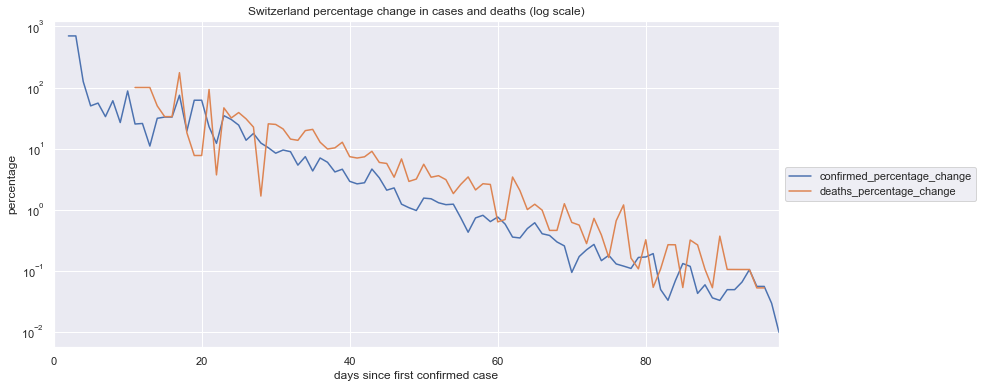

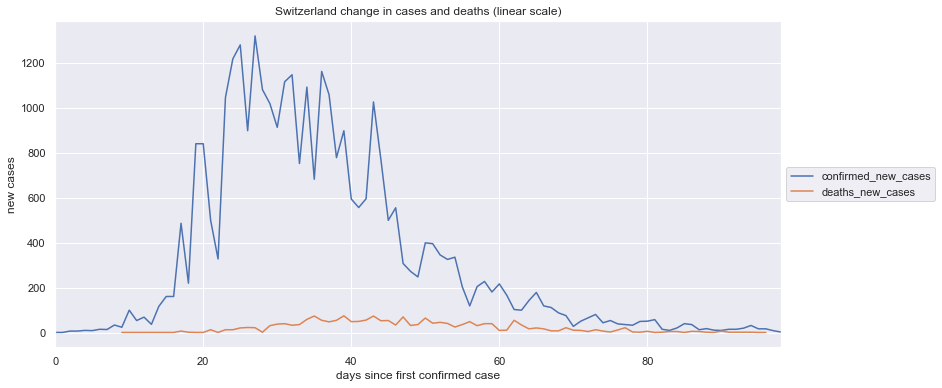

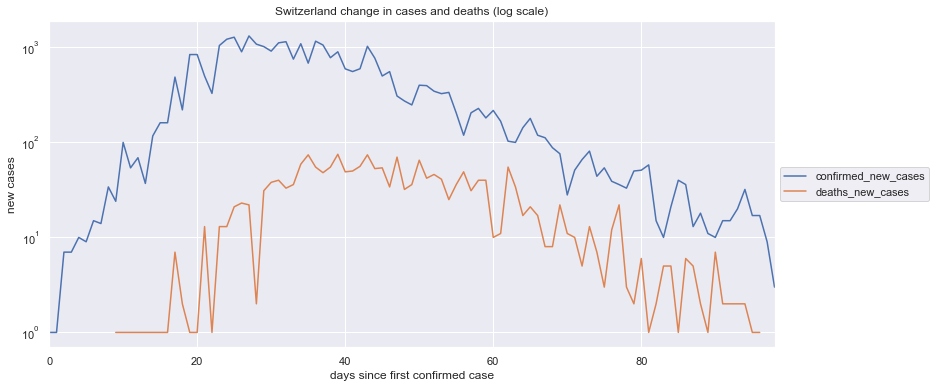

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
93       2909     175       NaN                     0.103235   
94       2915     175       NaN                     0.206256   
95       2917     175       NaN                     0.068611   
96       2918     179       NaN                     0.034282   
97       2937     179       NaN                     0.651131   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
93                                          65.963472                 
94                                         131.790890                 
95                                          43.839874                 
96                                          21.904908                 
97                                         416.050622                 

    deaths_percentage_change  \
93                  1.156069   
94                  1.156069   
95                  2.285714   
96                  2.285714   
97                       NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
93                                         738.689209           
94                                         738.689209           
95                                        1460.494092           
96                                        1460.494092           
97                                                NaN           

    confirmed_new_cases  deaths_new_cases  
93                  3.0               2.0  
94                  6.0               2.0  
95                  2.0               4.0  
96                  1.0               4.0  
97                 19.0               NaN

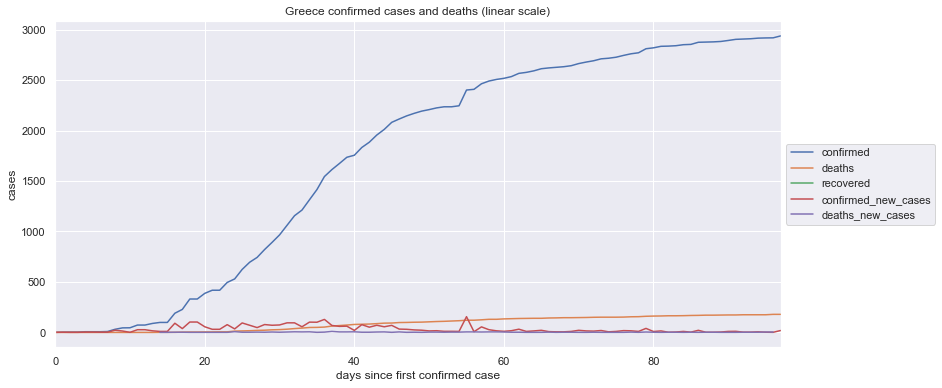

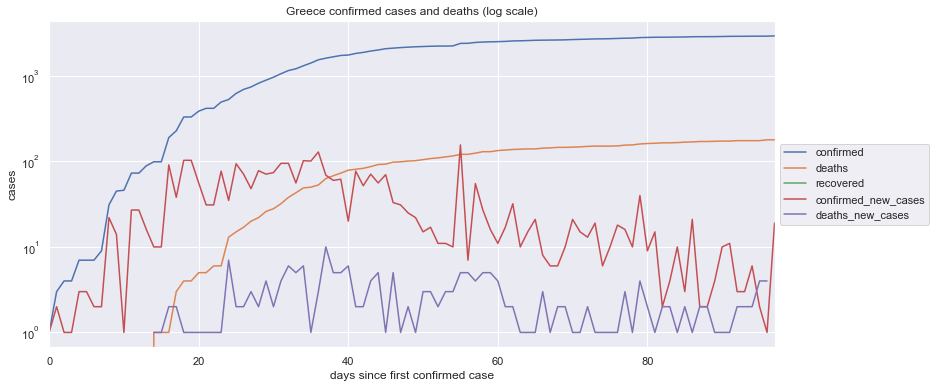

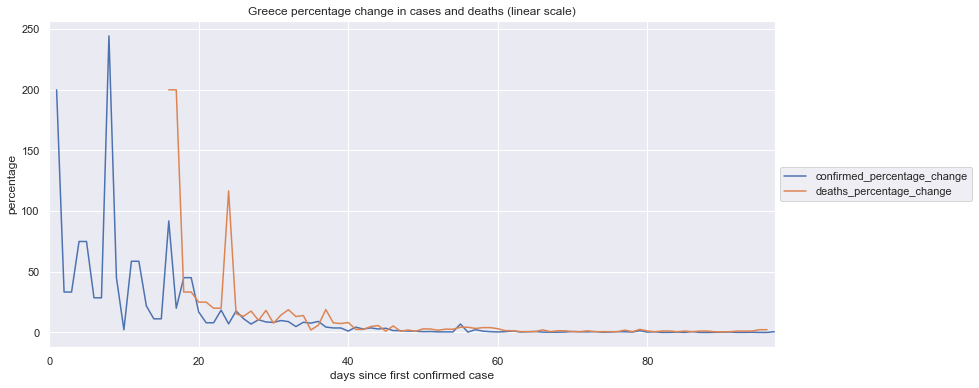

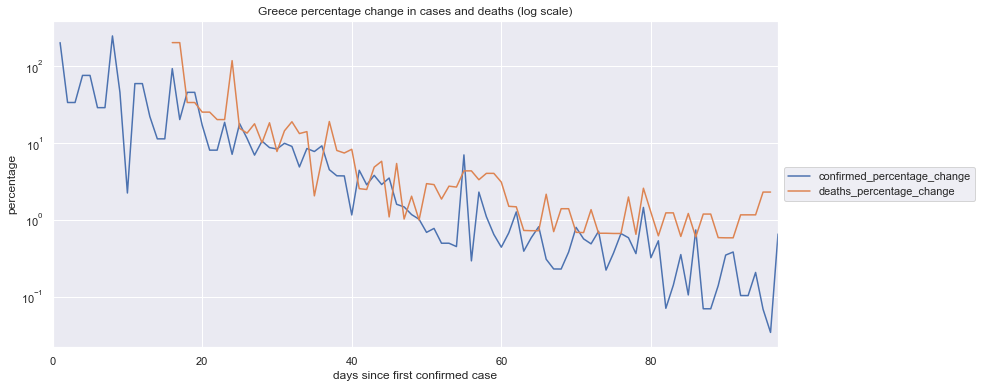

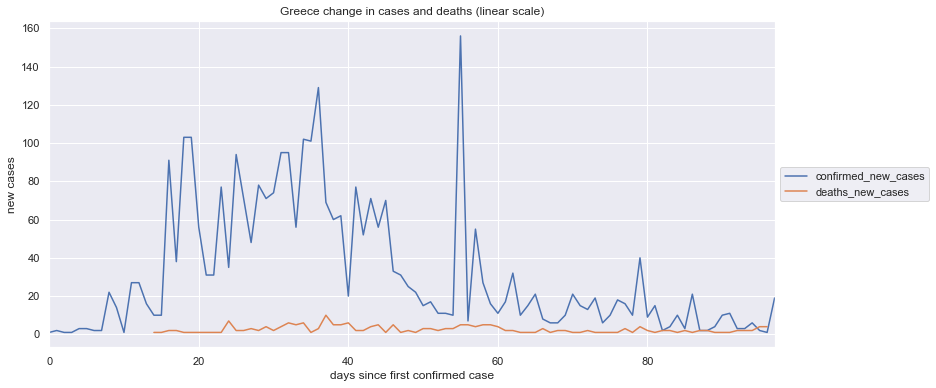

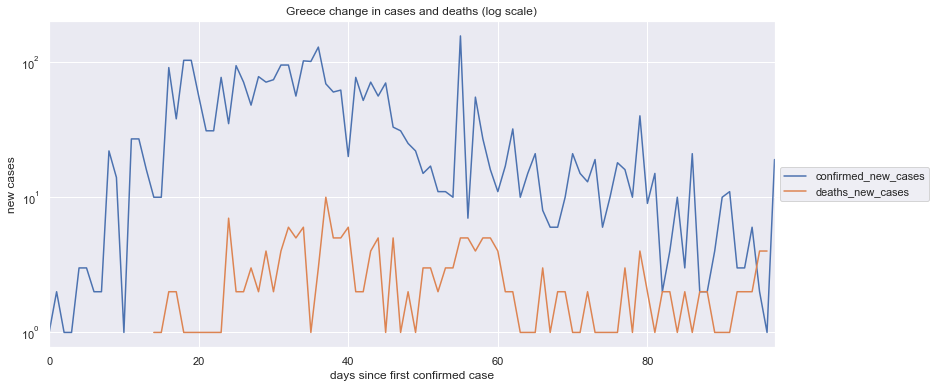

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
93       8422     236       NaN                     0.130781   
94       8437     236       NaN                     0.178105   
95       8440     236       NaN                     0.035558   
96       8446     236       NaN                     0.071090   
97       8455     237       NaN                     0.106559   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
93                                         256.964743                 
94                                         349.948800                 
95                                          69.865326                 
96                                         139.680986                 
97                                         209.372635                 

    deaths_percentage_change  \
93                  0.425532   
94                  0.425532   
95                  0.423729   
96                  0.423729   
97                  0.423729   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
93                                         836.104623           
94                                         836.104623           
95                                         832.561807           
96                                         832.561807           
97                                         832.561807           

    confirmed_new_cases  deaths_new_cases  
93                 11.0               1.0  
94                 15.0               1.0  
95                  3.0               1.0  
96                  6.0               1.0  
97                  9.0               1.0

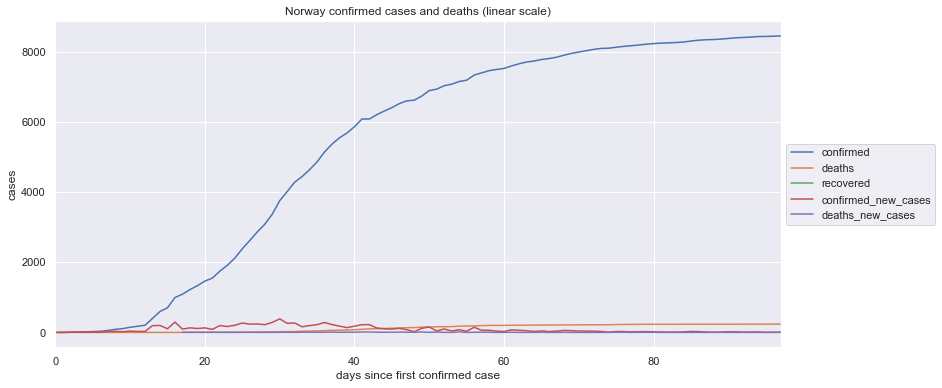

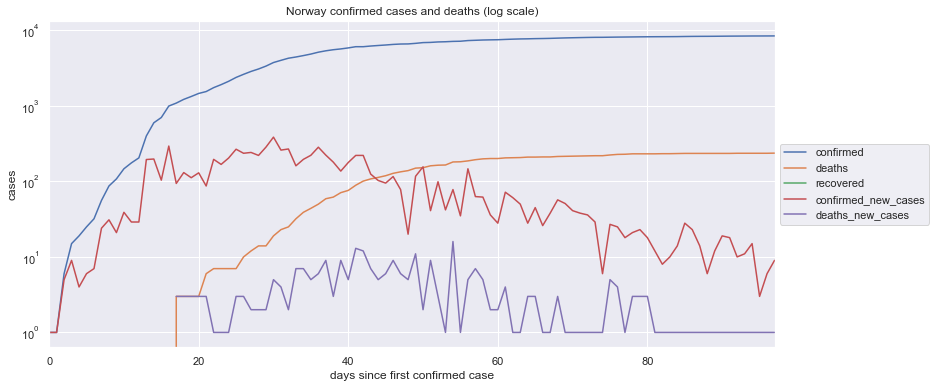

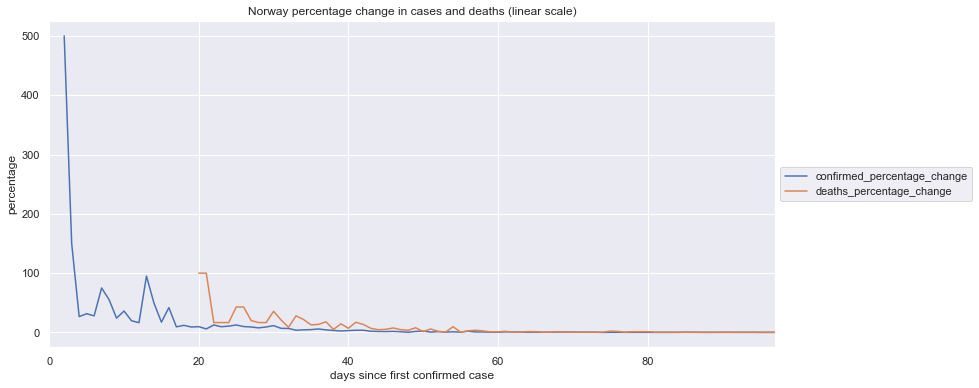

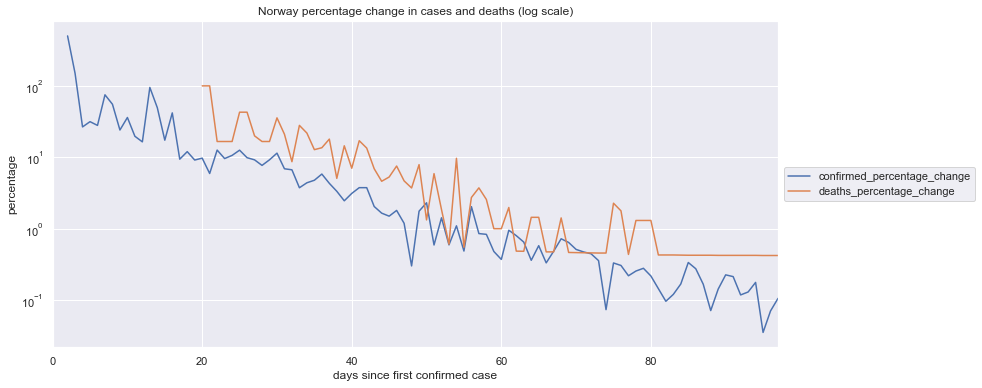

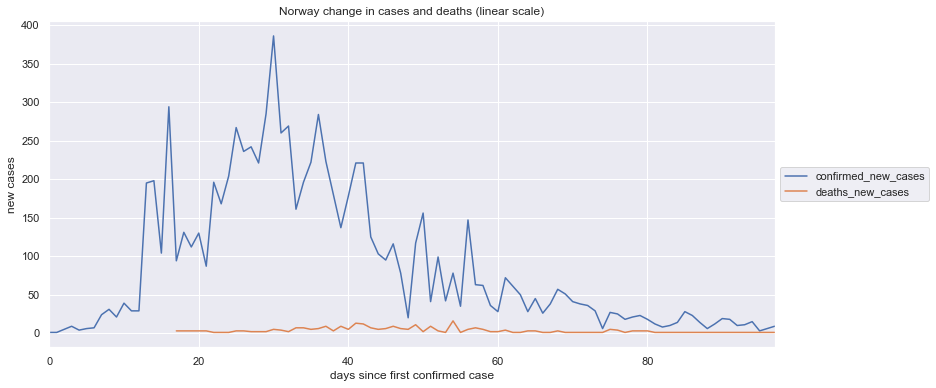

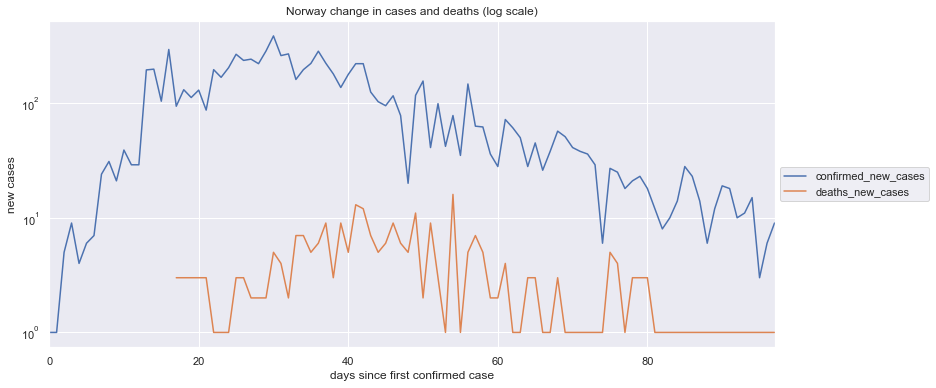

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths recovered  confirmed_percentage_change  \
94      16655     668       NaN                     0.162377   
95      16685     668       NaN                     0.180126   
96      16731     668       NaN                     0.275697   
97      16733     668       NaN                     0.011954   
98      16759     669       NaN                     0.155382   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
94                                         632.435325                 
95                                         701.566736                 
96                                        1073.801465                 
97                                          46.558660                 
98                                         605.190230                 

    deaths_percentage_change  \
94                  3.565891   
95                  3.565891   
96                  0.149701   
97                  0.149701   
98                  0.149701   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
94                                       13888.664685           
95                                       13888.664685           
96                                         583.063572           
97                                         583.063572           
98                                         583.063572           

    confirmed_new_cases  deaths_new_cases  
94                 27.0              23.0  
95                 30.0              23.0  
96                 46.0               1.0  
97                  2.0               1.0  
98                 26.0               1.0

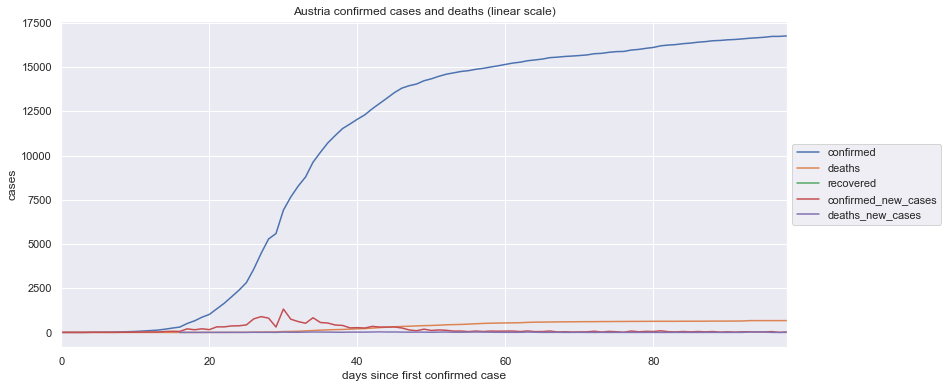

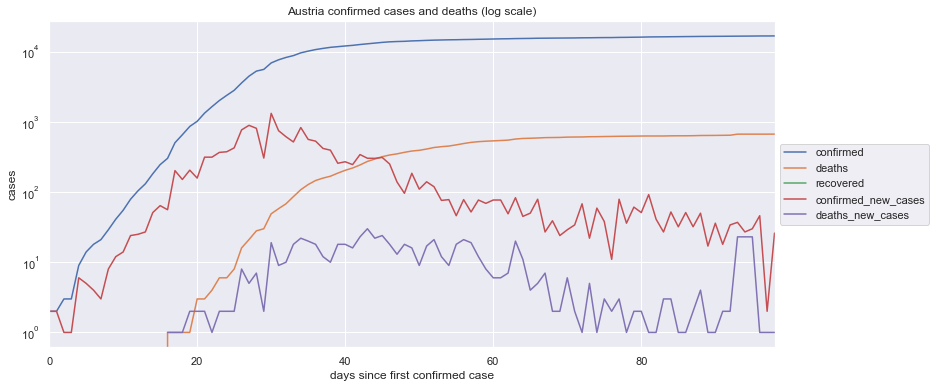

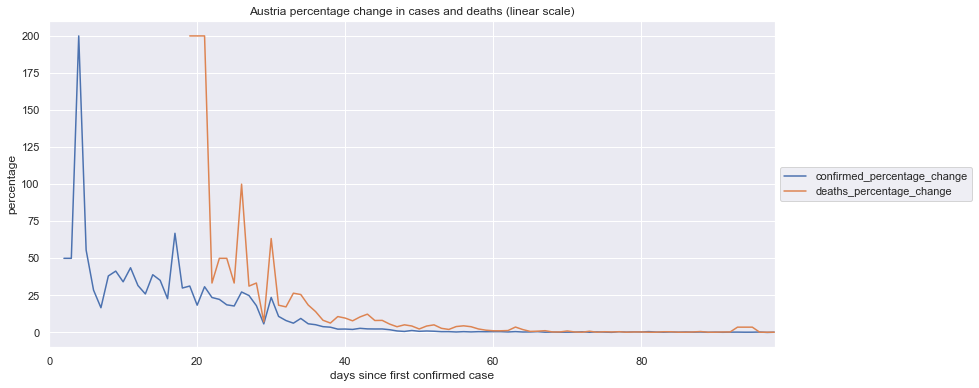

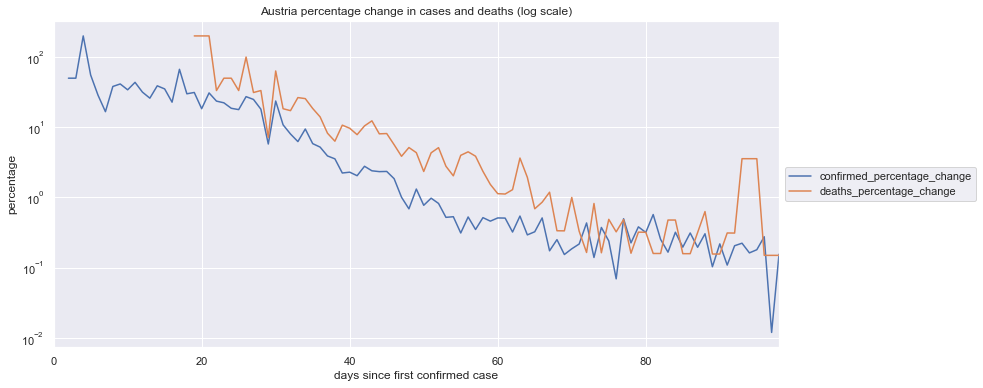

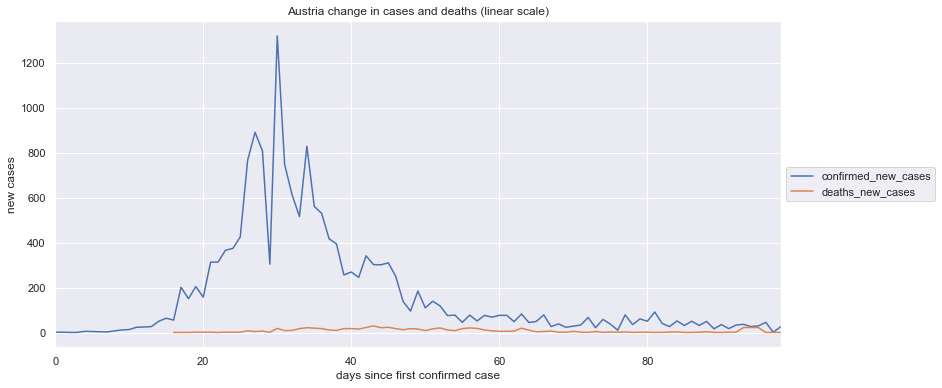

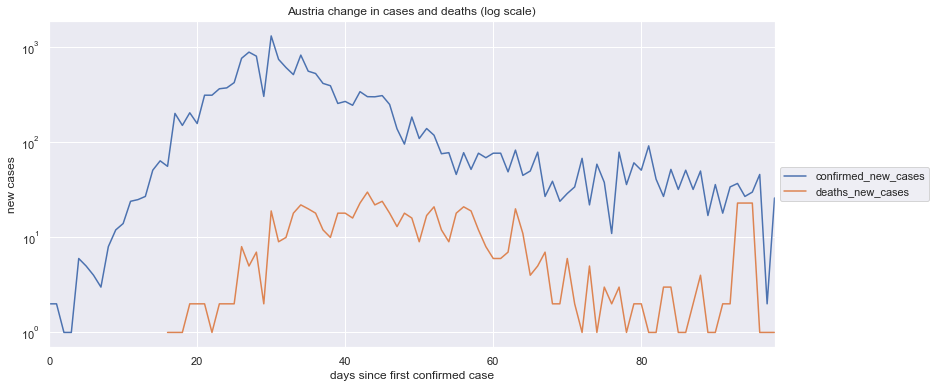

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
119      36476    4350       NaN                     2.096454   
120      37113    4395       NaN                     1.746354   
121      37542    4395       NaN                     1.155929   
122      37814    4403       NaN                     0.724522   
123      38589    4468       NaN                     2.049505   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
119                                       11115.996305                 
120                                        9259.666630                 
121                                        6129.066827                 
122                                        3841.621955                 
123                                       10867.063597                 

     deaths_percentage_change  \
119                  1.969058   
120                  1.034483   
121                  1.034483   
122                  0.182025   
123                  1.476266   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
119                                       10440.506329           
120                                        5485.123153           
121                                        5485.123153           
122                                         965.148708           
123                                        7827.585088           

     confirmed_new_cases  deaths_new_cases  
119                749.0              84.0  
120                637.0              45.0  
121                429.0              45.0  
122                272.0               8.0  
123                775.0              65.0

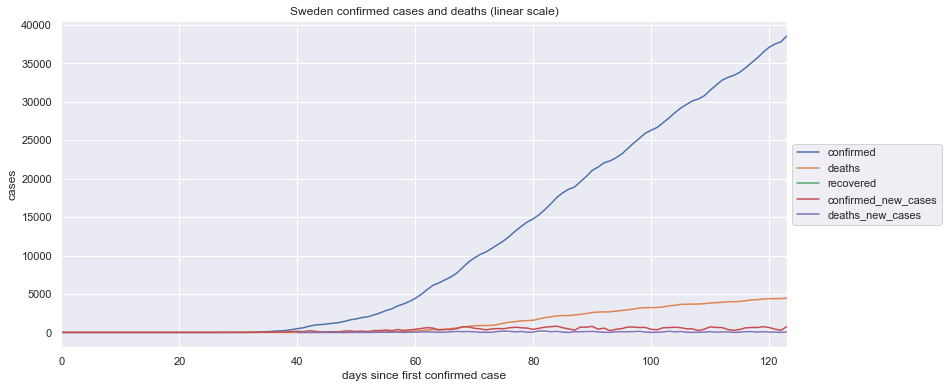

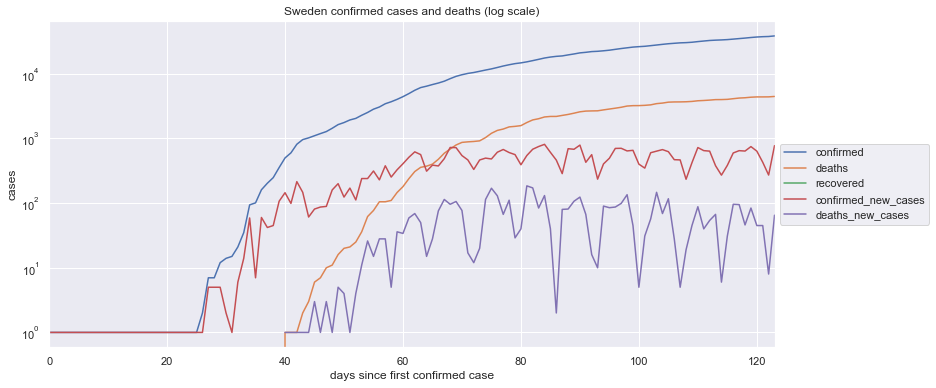

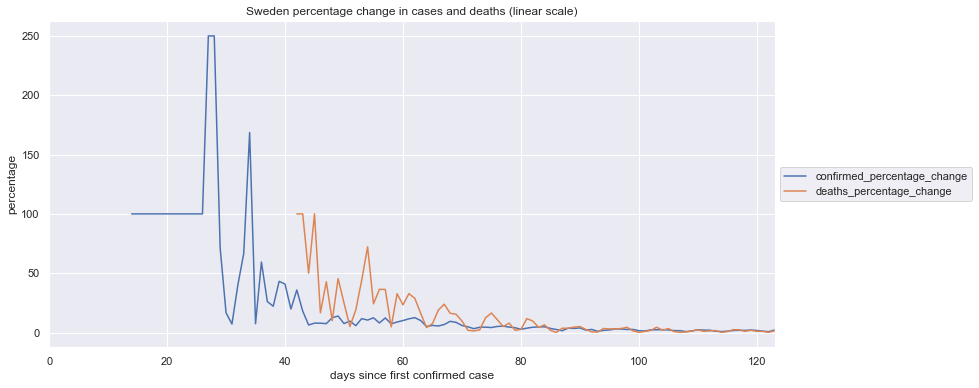

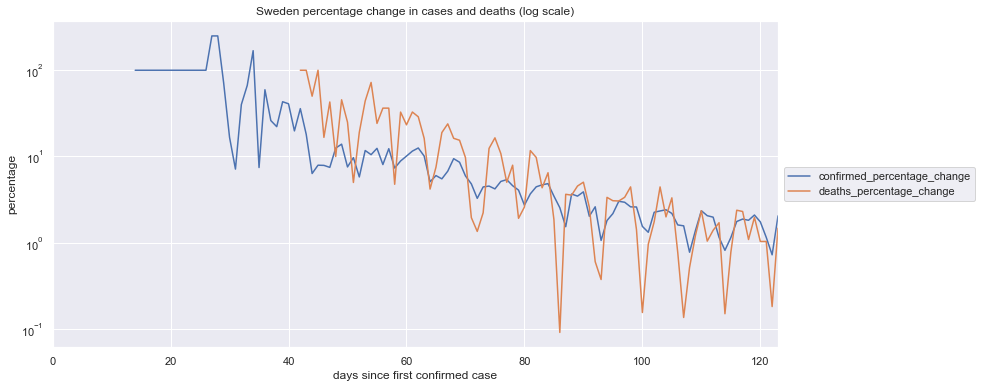

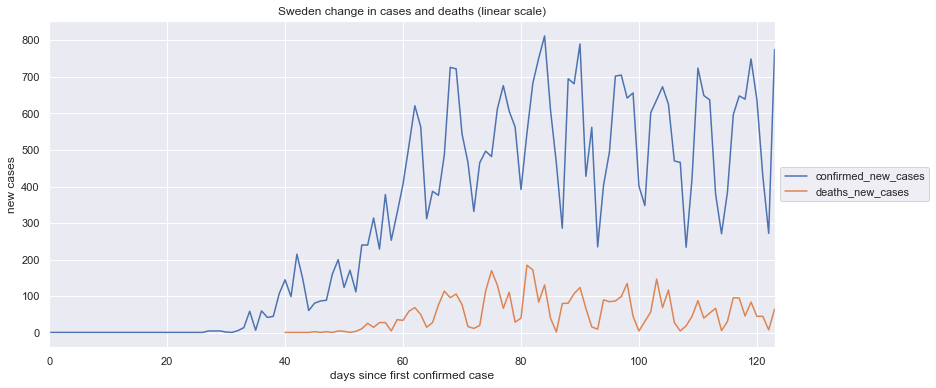

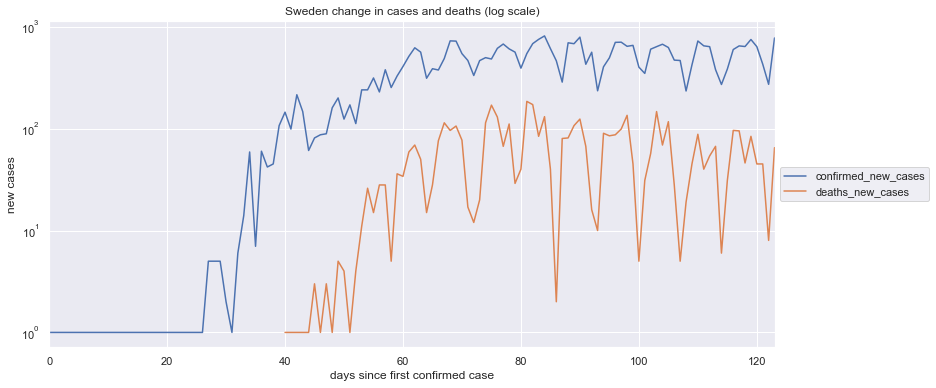

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
90      24876    1645       NaN                     0.140896   
91      24929    1651       NaN                     0.213057   
92      24990    1652       NaN                     0.244695   
93      25062    1650       NaN                     0.288115   
94      25066    1658       NaN                     0.015960   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
90                                         619.717191                 
91                                         937.108540                 
92                                        1076.265828                 
93                                        1267.245665                 
94                                          70.200279                 

    deaths_percentage_change  \
90                  0.366077   
91                  0.364742   
92                  0.060569   
93                 -0.121065   
94                  0.484848   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
90                                        1610.151982           
91                                        1604.279087           
92                                         266.408146           
93                                        -532.493765           
94                                        2132.556847           

    confirmed_new_cases  deaths_new_cases  
90                 35.0               6.0  
91                 53.0               6.0  
92                 61.0               1.0  
93                 72.0              -2.0  
94                  4.0               8.0

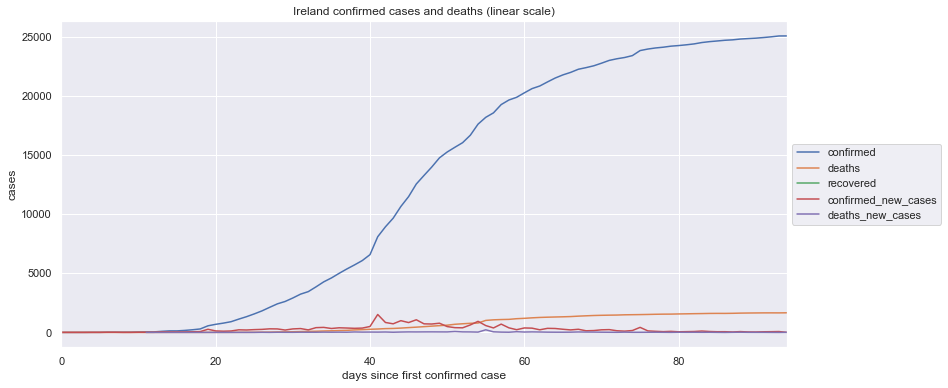

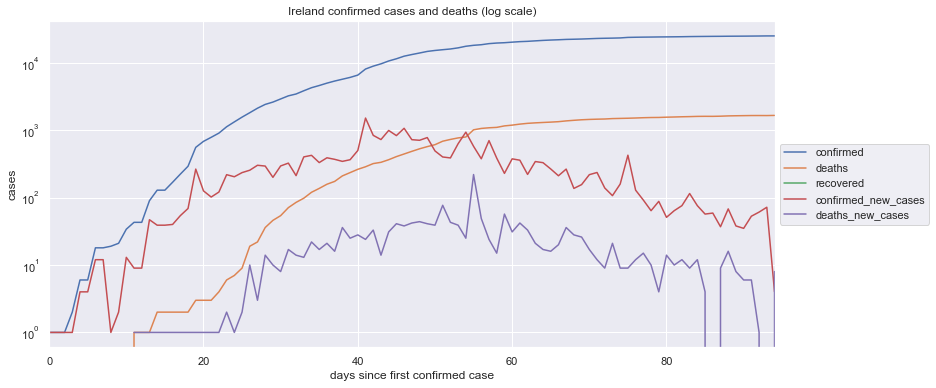

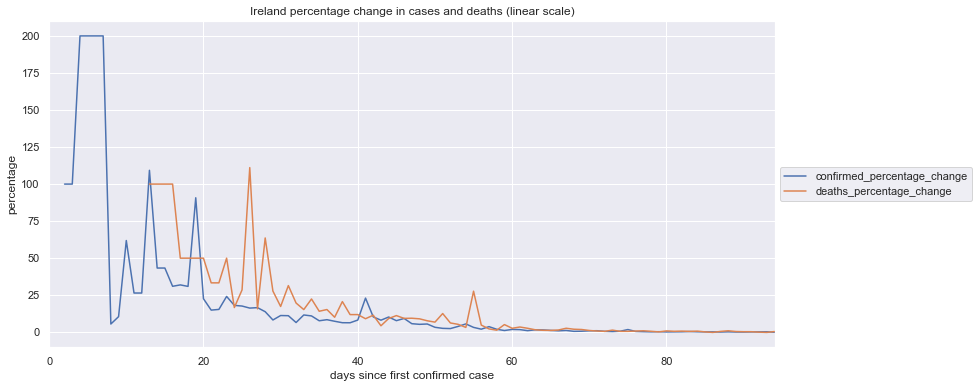

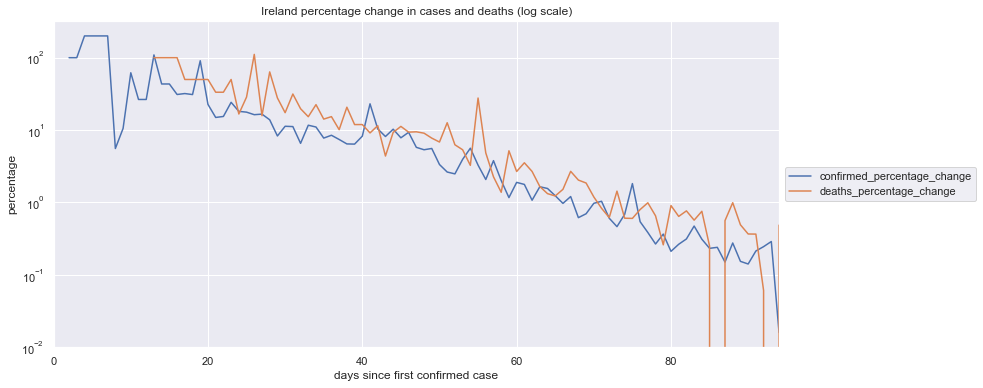

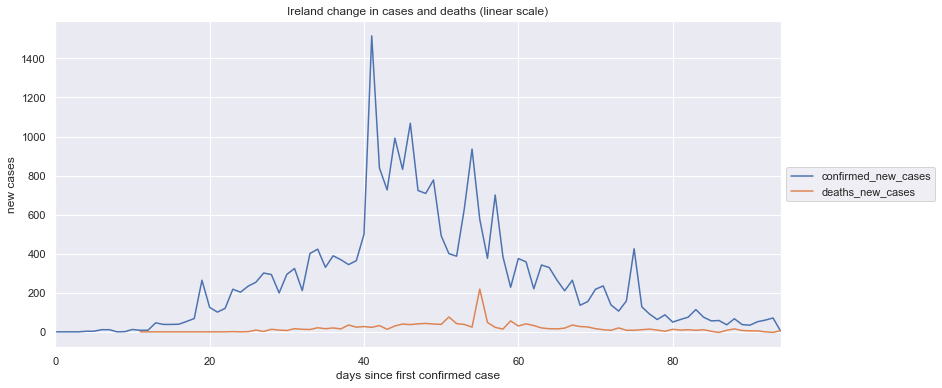

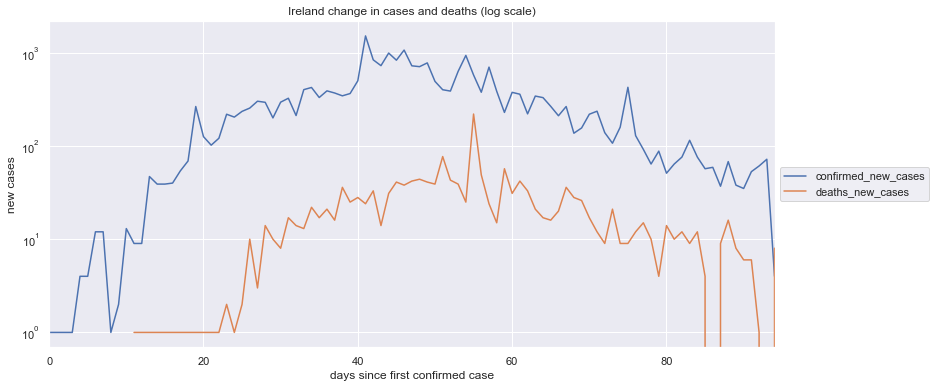

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
119     271222   38161       NaN                     0.778443   
120     272826   38376       NaN                     0.591397   
121     274762   38489       NaN                     0.709610   
122     276332   39045       NaN                     0.571404   
123     277985   39369       NaN                     0.598193   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
119                                       32179.705358                 
120                                       24447.516961                 
121                                       29334.244234                 
122                                       23621.000551                 
123                                       24728.454799                 

     deaths_percentage_change  \
119                  0.856305   
120                  0.563402   
121                  0.294455   
122                  1.444569   
123                  0.829812   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
119                                       35398.399108           
120                                       23290.242981           
121                                       12172.339150           
122                                       59716.379624           
123                                       34303.220056           

     confirmed_new_cases  deaths_new_cases  
119               2095.0             324.0  
120               1604.0             215.0  
121               1936.0             113.0  
122               1570.0             556.0  
123               1653.0             324.0

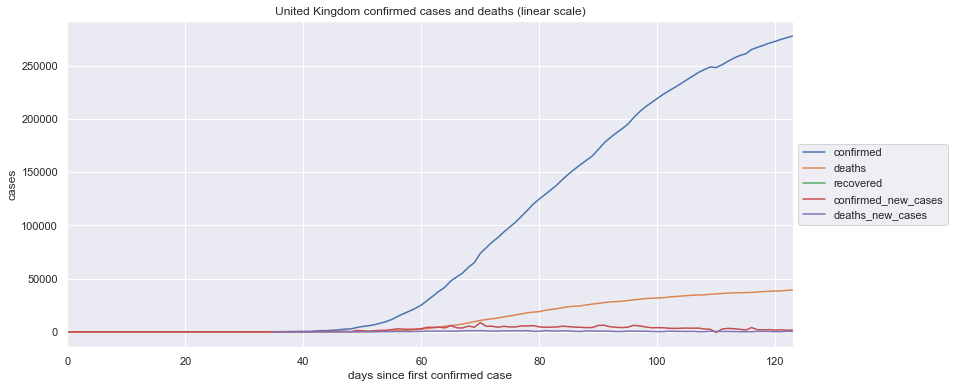

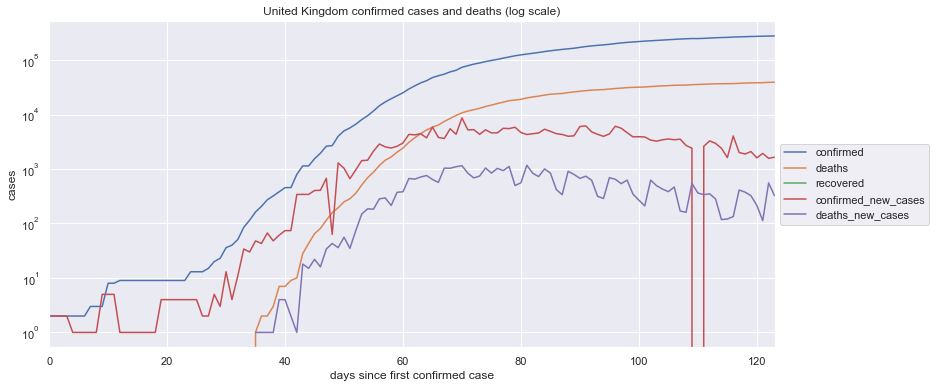

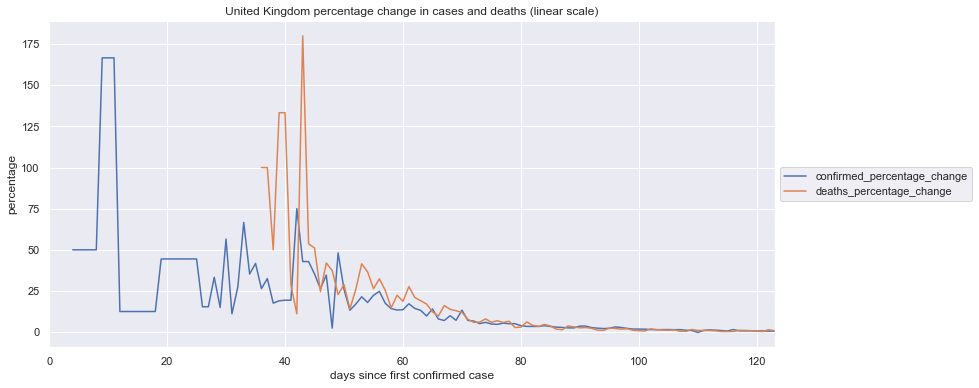

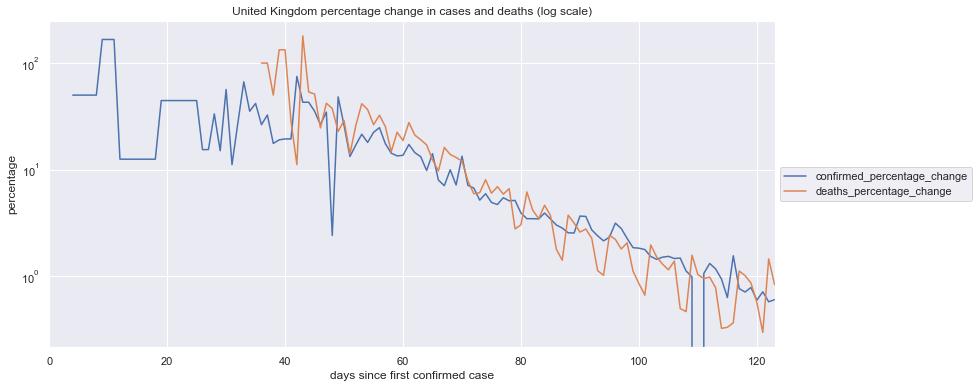

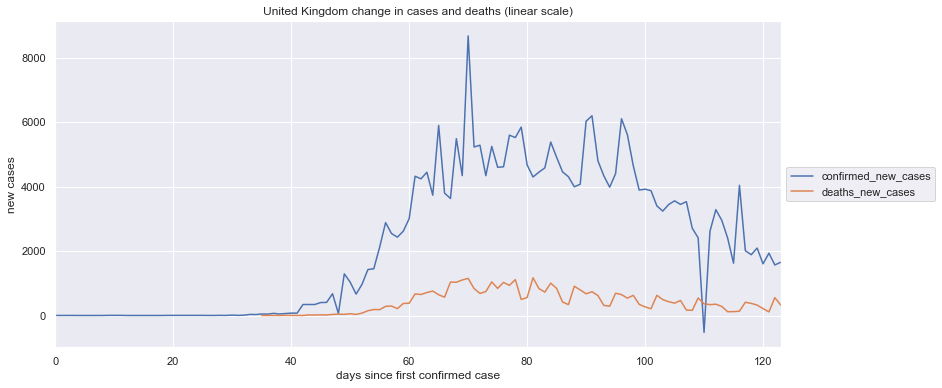

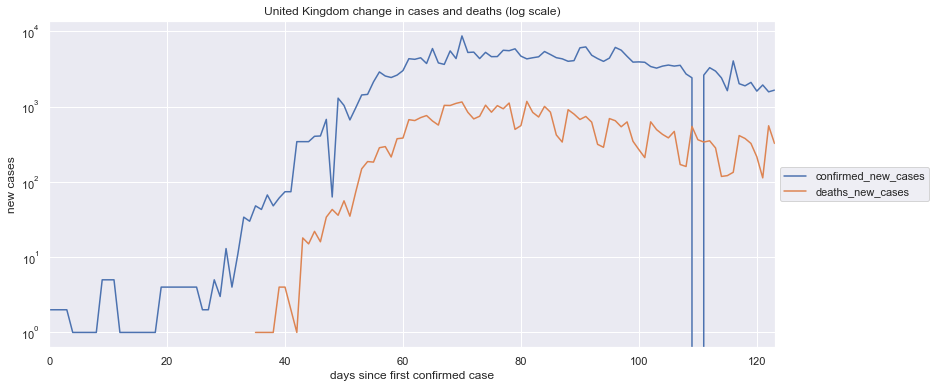

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
123     182922    8504       NaN                     0.398472   
124     183189    8530       NaN                     0.145964   
125     183410    8540       NaN                     0.120640   
126     183594    8555       NaN                     0.100322   
127     183879    8563       NaN                     0.155234   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
123                                       15469.956889                 
124                                        5666.783765                 
125                                        4683.647508                 
126                                        3894.808714                 
127                                        6026.673958                 

     deaths_percentage_change  \
123                  0.401417   
124                  0.305738   
125                  0.117233   
126                  0.175644   
127                  0.093513   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
123                                       15584.283051           
124                                       11869.745772           
125                                        4551.371541           
126                                        6819.063100           
127                                        3630.456972           

     confirmed_new_cases  deaths_new_cases  
123                726.0              34.0  
124                267.0              26.0  
125                221.0              10.0  
126                184.0              15.0  
127                285.0               8.0

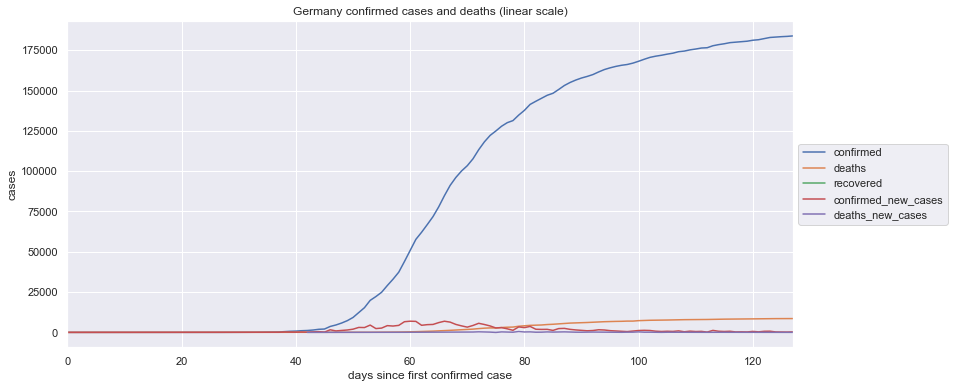

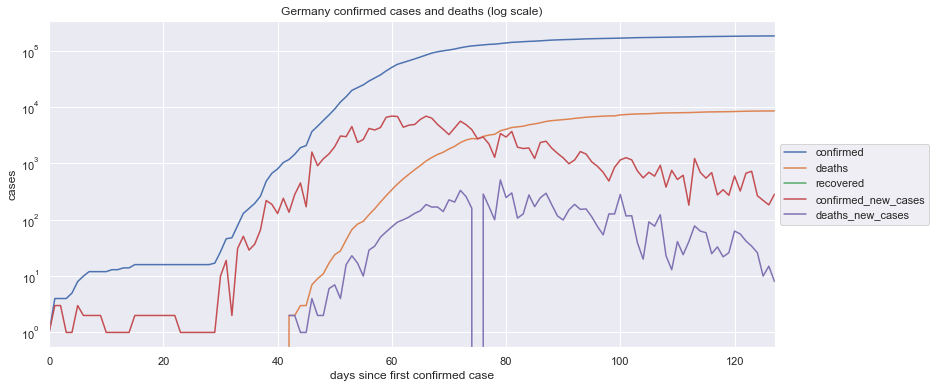

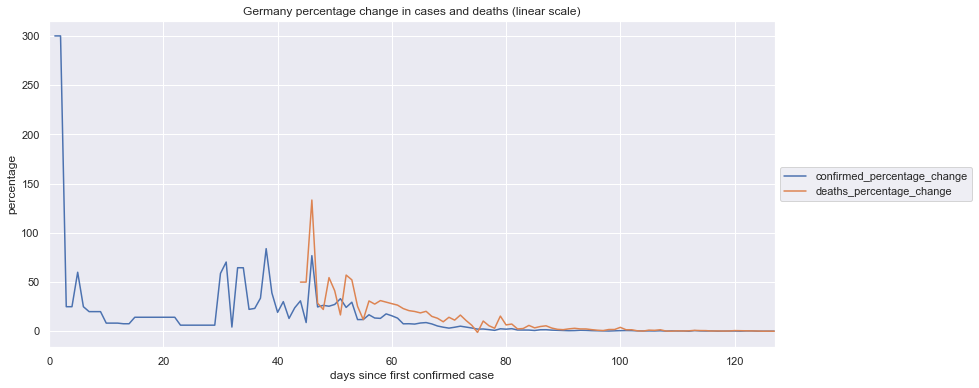

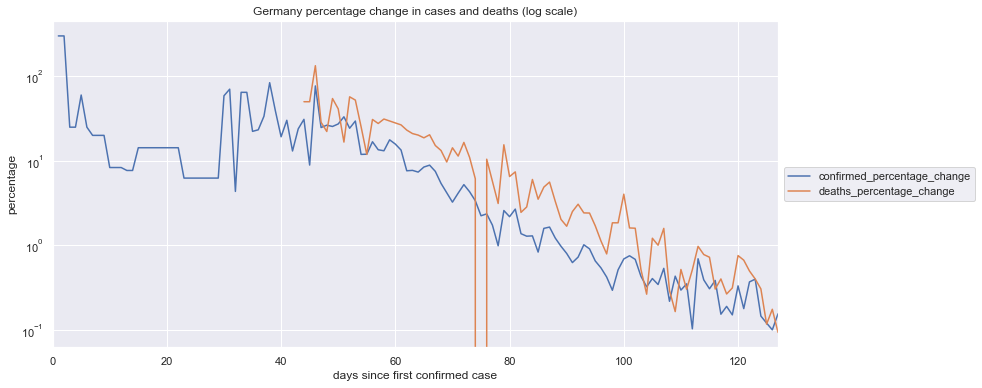

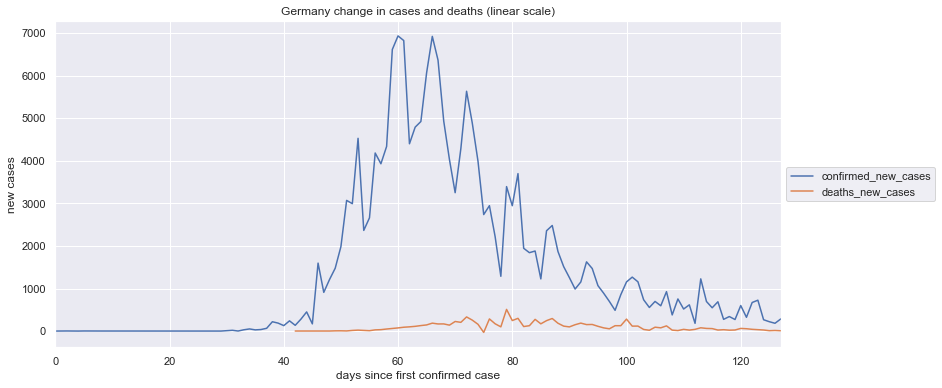

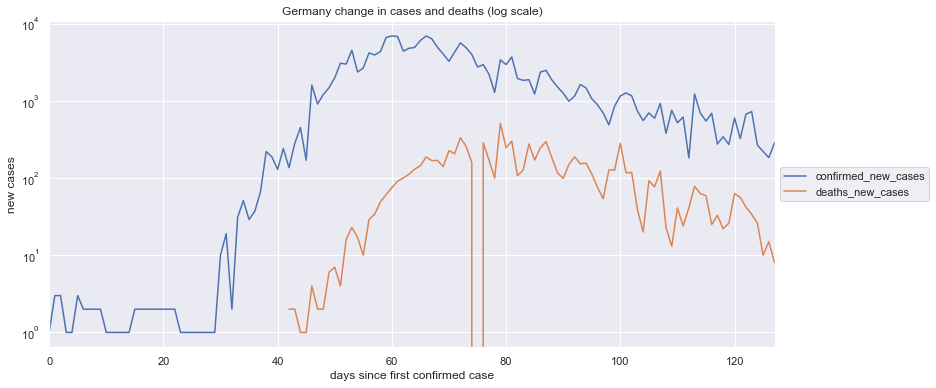

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
119     232248   33229       NaN                     0.222671   
120     232664   33340       NaN                     0.179119   
121     232997   33415       NaN                     0.143125   
122     233197   33475       NaN                     0.085838   
123     233515   33530       NaN                     0.136365   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
119                                       11320.928486                 
120                                        9106.672178                 
121                                        7276.682039                 
122                                        4364.133444                 
123                                        6933.021008                 

     deaths_percentage_change  \
119                  0.262507   
120                  0.334046   
121                  0.224955   
122                  0.179560   
123                  0.164302   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
119                                       13346.238911           
120                                       16983.377471           
121                                       11437.050090           
122                                        9129.103696           
123                                        8353.345780           

     confirmed_new_cases  deaths_new_cases  
119                516.0              87.0  
120                416.0             111.0  
121                333.0              75.0  
122                200.0              60.0  
123                318.0              55.0

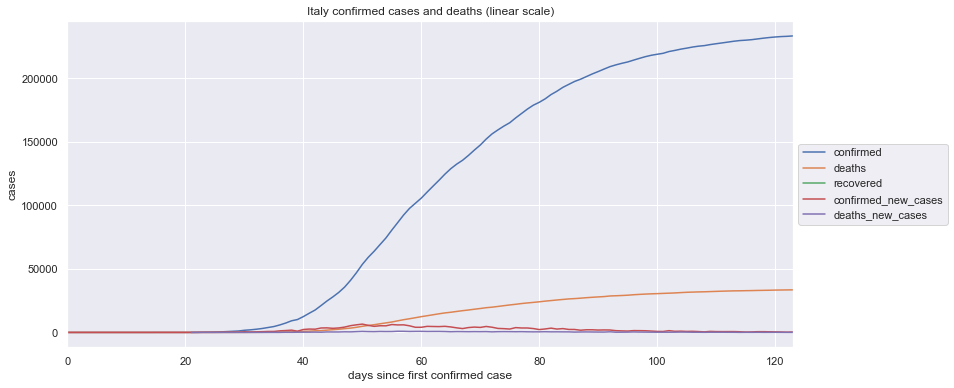

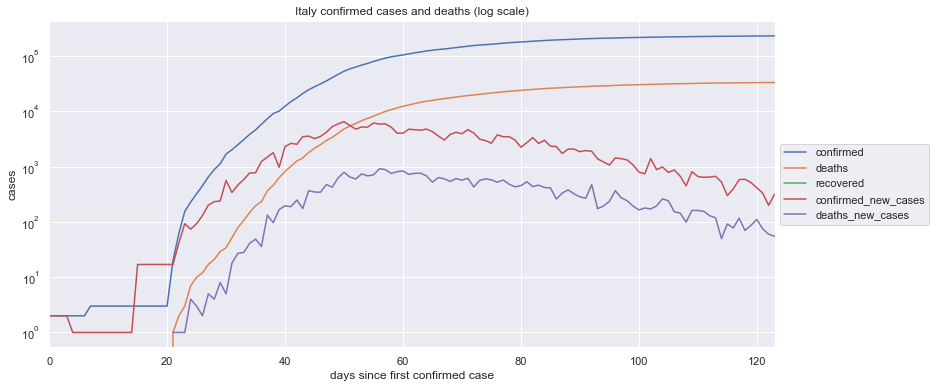

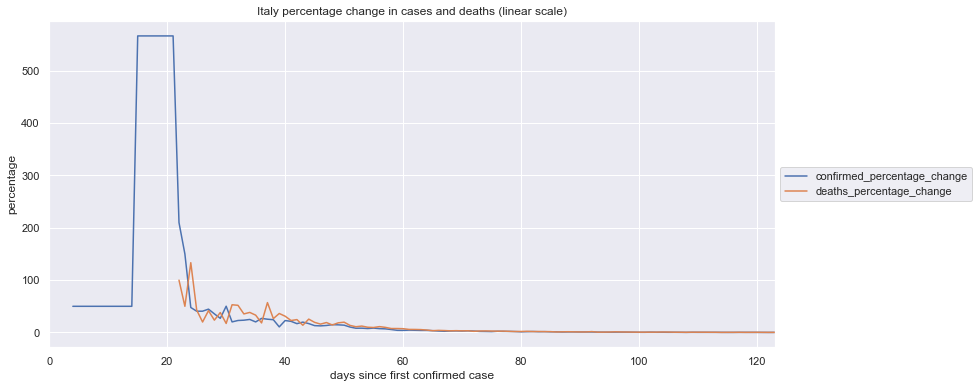

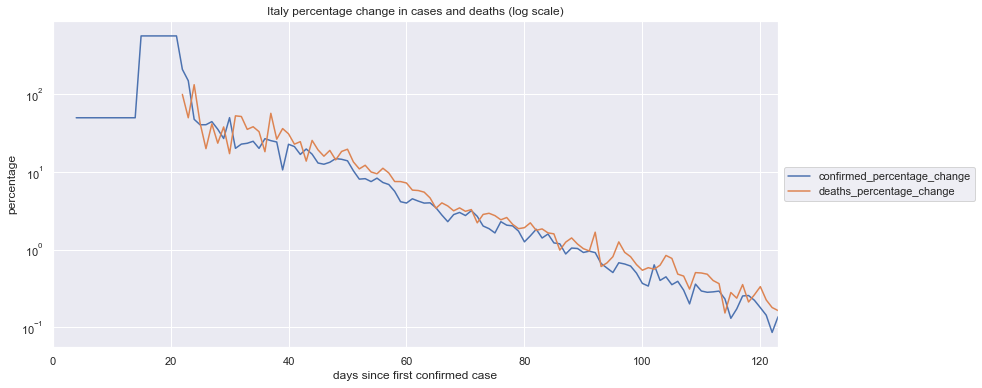

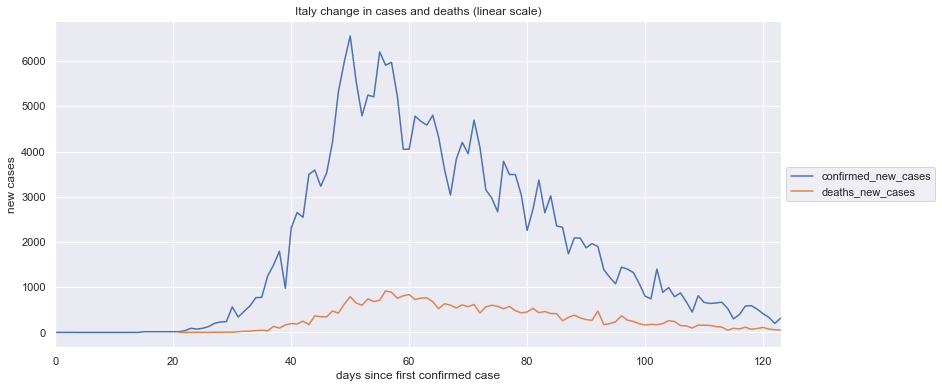

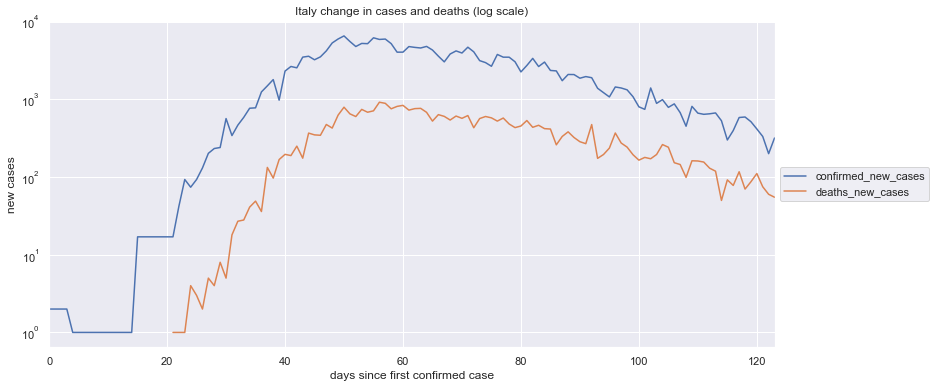

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
128    1746019  102809       NaN                     1.409378   
129    1770165  103776       NaN                     1.382917   
130    1790172  104381       NaN                     1.130234   
131    1811020  105149       NaN                     1.164581   
132    1831821  106180       NaN                     1.148579   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
128                                      368074.801561                 
129                                      361164.431079                 
130                                      295173.227714                 
131                                      304143.388411                 
132                                      299964.395774                 

     deaths_percentage_change  \
128                  1.174028   
129                  0.940579   
130                  0.582986   
131                  0.735766   
132                  0.980513   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
128                                      306610.547052           
129                                      245642.823651           
130                                      152253.466492           
131                                      192153.592554           
132                                      256072.098344           

     confirmed_new_cases  deaths_new_cases  
128              24266.0            1193.0  
129              24146.0             967.0  
130              20007.0             605.0  
131              20848.0             768.0  
132              20801.0            1031.0

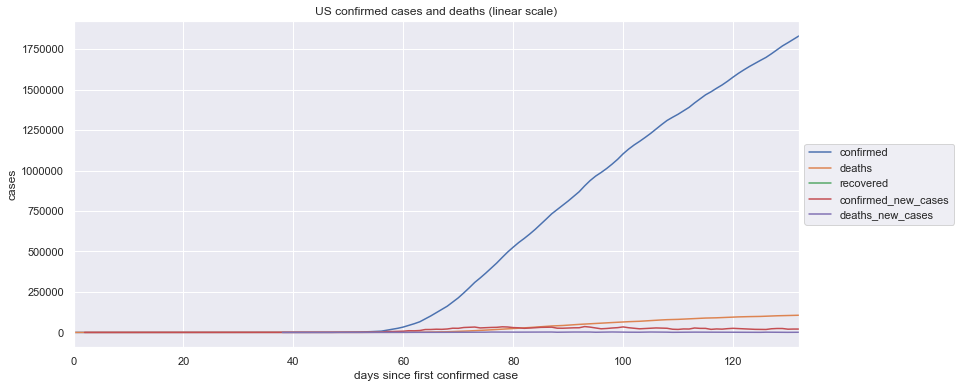

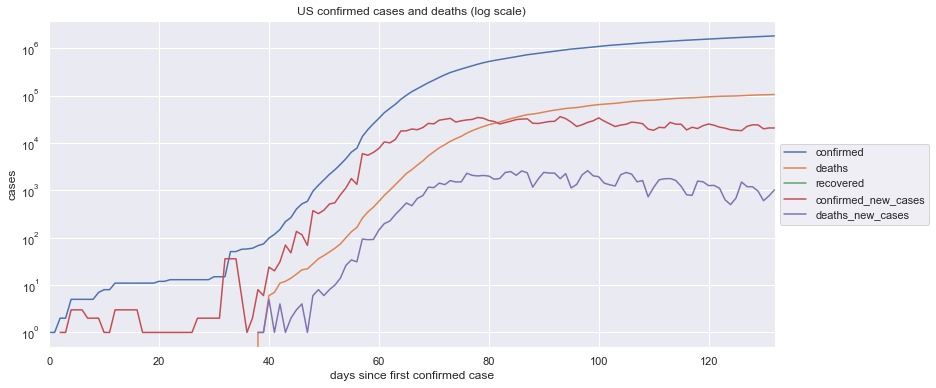

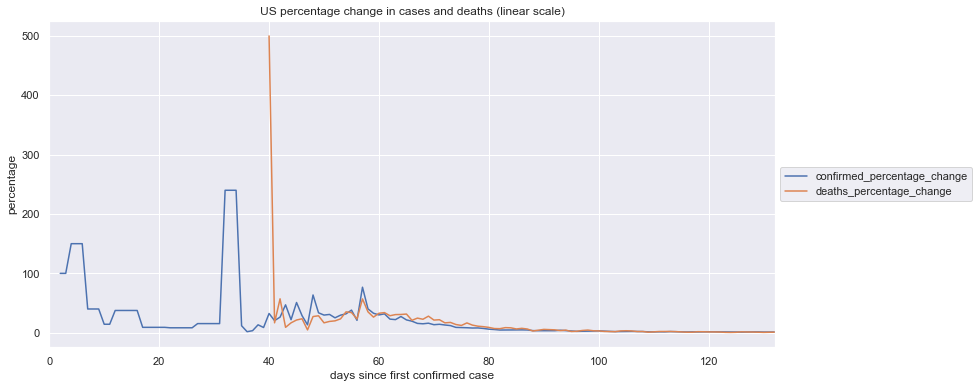

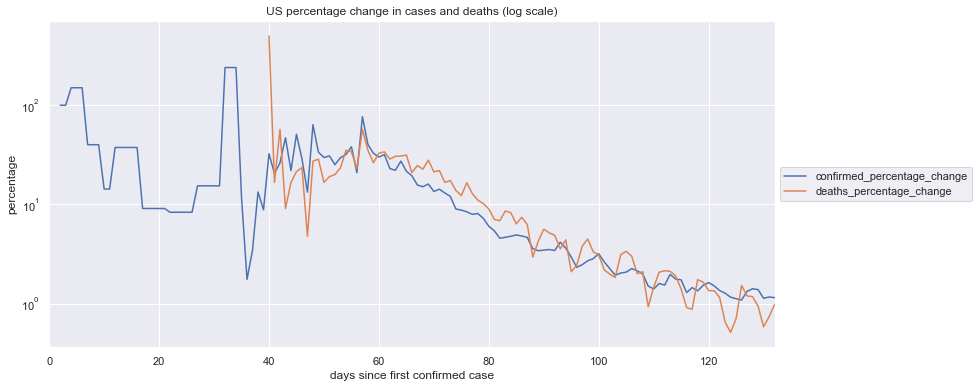

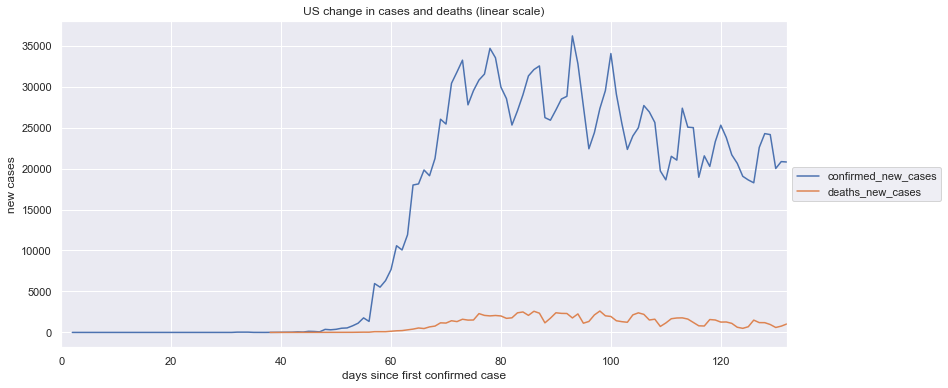

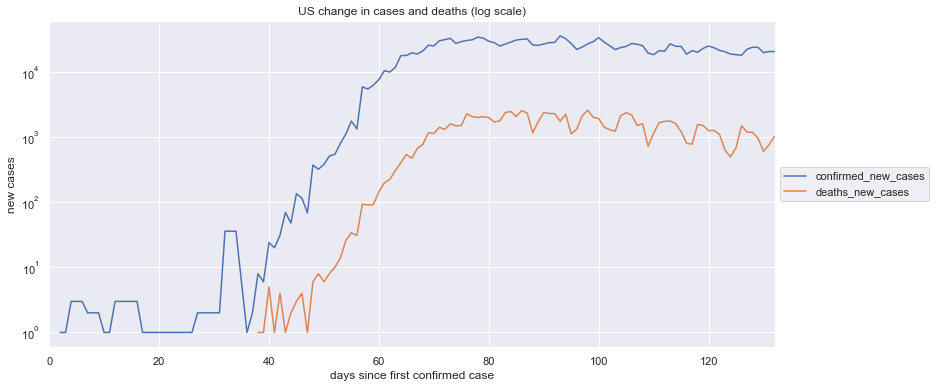

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Mongolia

confirmed  deaths recovered  confirmed_percentage_change  \
80        179       0       NaN                    11.180124   
81        179       0       NaN                    11.180124   
82        179       0       NaN                     3.351955   
83        185       0       NaN                     3.351955   
84        185       0       NaN                          NaN   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
80                                         185.480783                 
81                                         185.480783                 
82                                          55.609695                 
83                                          55.609695                 
84                                                NaN                 

    deaths_percentage_change  \
80                       NaN   
81                       NaN   
82                       NaN   
83                       NaN   
84                       NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
80                                                NaN           
81                                                NaN           
82                                                NaN           
83                                                NaN           
84                                                NaN           

    confirmed_new_cases  deaths_new_cases  
80                 18.0               NaN  
81                 18.0               NaN  
82                  6.0               NaN  
83                  6.0               NaN  
84                  NaN               NaN

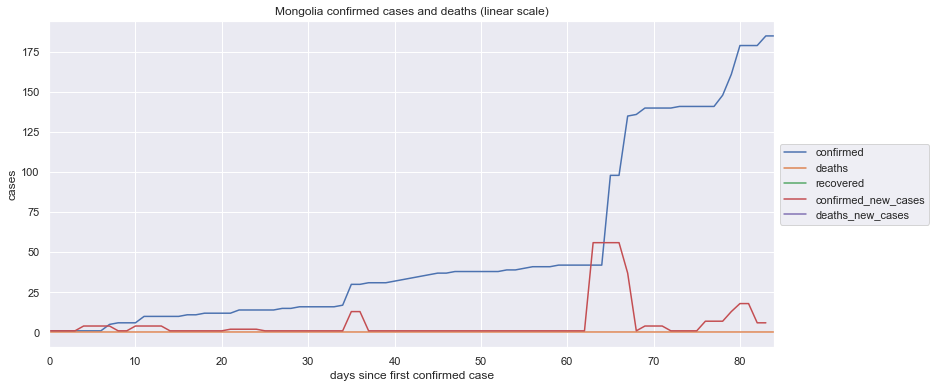

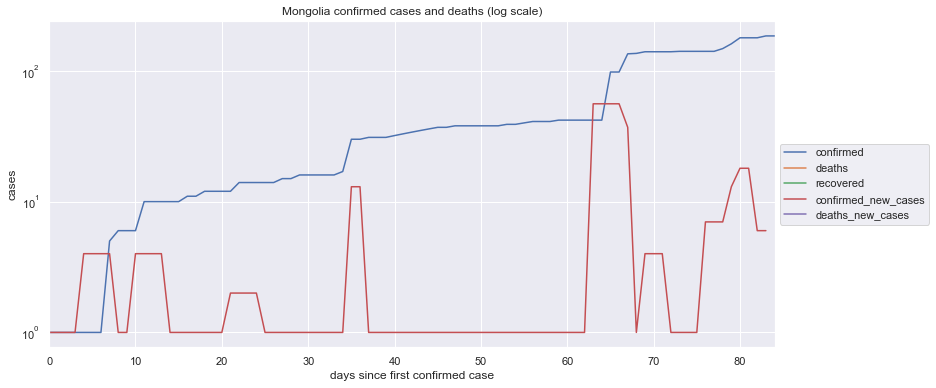

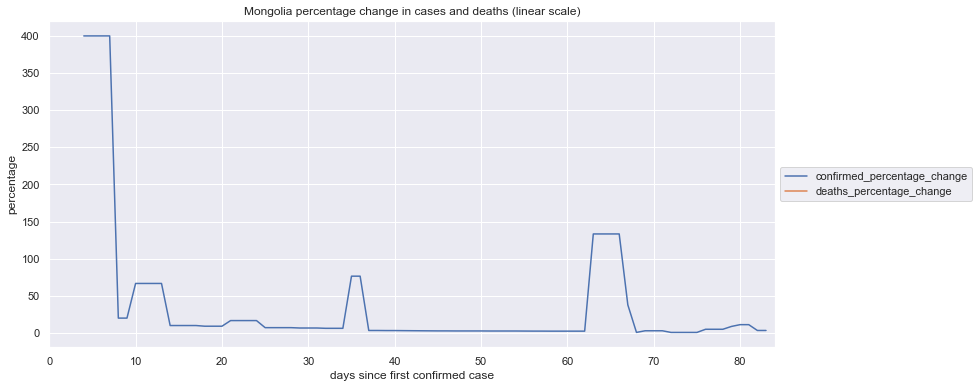

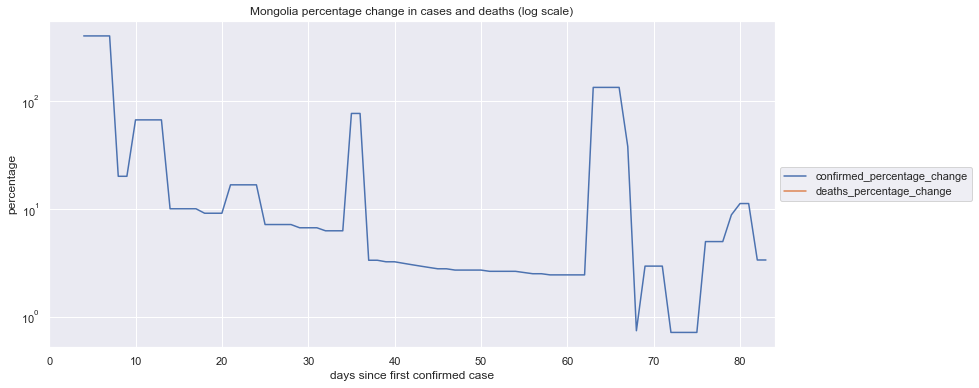

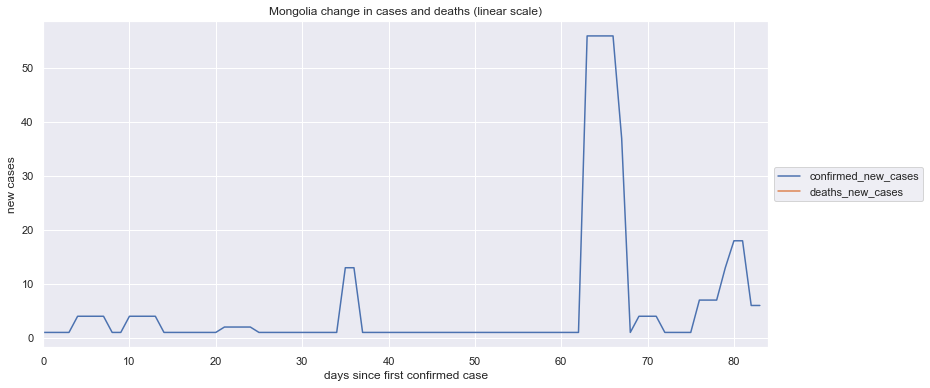

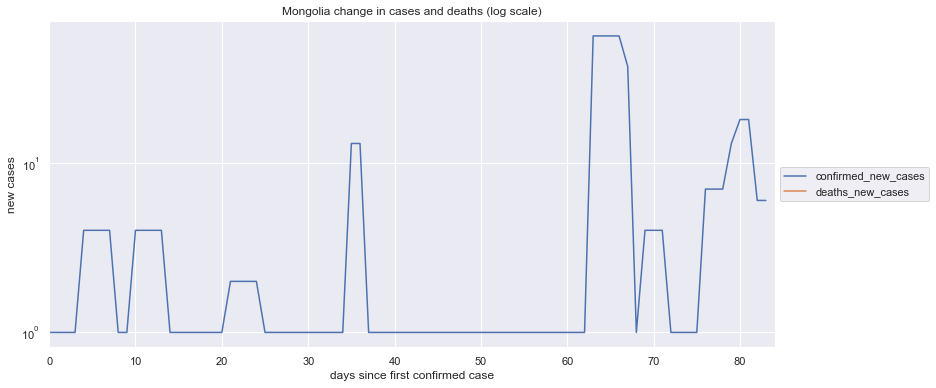

In [20]:
location_name = 'Mongolia'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [21]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']
Mongolia                 = locations['Mongolia']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland,
                            Mongolia]

In [22]:
#South_Korea

In [23]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                 Mongolia.add_suffix('_Mongolia'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
128                  11441                 269                   NaN   
129                  11468                 270                   NaN   
130                  11503                 271                   NaN   
131                  11541                 272                   NaN   
132                  11590                 273                   NaN   

     confirmed_percentage_change_South_Korea  \
128                                 0.342045   
129                                 0.235993   
130                                 0.305197   
131                                 0.330349   
132                                 0.424573   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
128                                        1206.934972                             
129                                         832.722079                             
130                                        1076.913104                             
131                                        1165.662374                             
132                                        1498.141865                             

     deaths_percentage_change_South_Korea  \
128                              0.371747   
129                              0.371747   
130                              0.370370   
131                              0.369004   
132                              0.367647   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
128                                        1311.740783                       
129                                        1311.740783                       
130                                        1306.882484                       
131                                        1302.060039                       
132                                        1297.273054                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
128                             39.0                           1.0   
129                             27.0                           1.0   
130                             35.0                           1.0   
131                             38.0                           1.0   
132                             49.0                           1.0   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
128               NaN            NaN              NaN   
129               NaN            NaN              NaN   
130               NaN            NaN              NaN   
131               NaN            NaN              NaN   
132               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
128                                 NaN   
129                                 NaN   
130                                 NaN   
131                                 NaN   
132                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
128                                                NaN                        
129                                                NaN                        
130                                                NaN                        
131                                                NaN                        
132                                                NaN                        

     deaths_percentage_change_Sweden  \
128                              NaN   
129                              NaN   
130                              NaN   
131                              NaN   
132                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
128                                                NaN                  
129                                                NaN                  
130                                                NaN                  
131    

# comparisons: confirmed cases

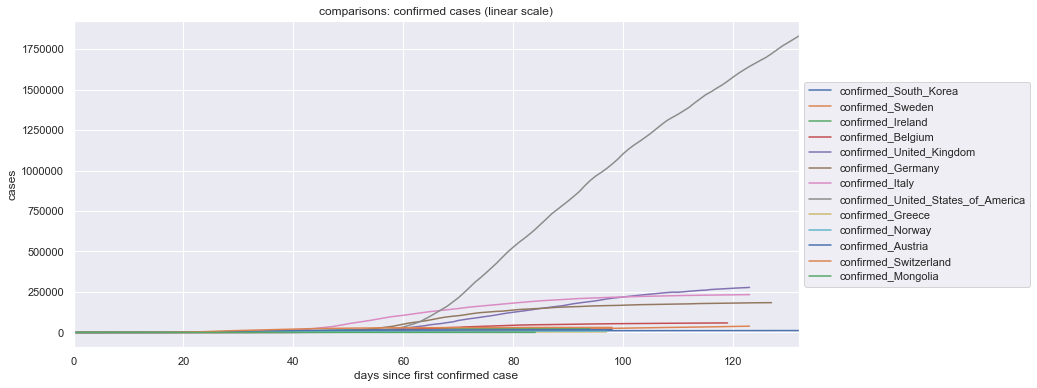

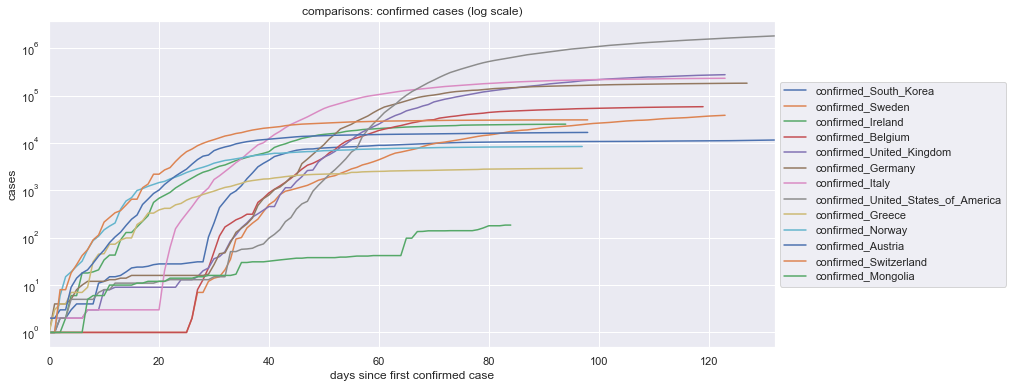

In [24]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland',
    'confirmed_Mongolia']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

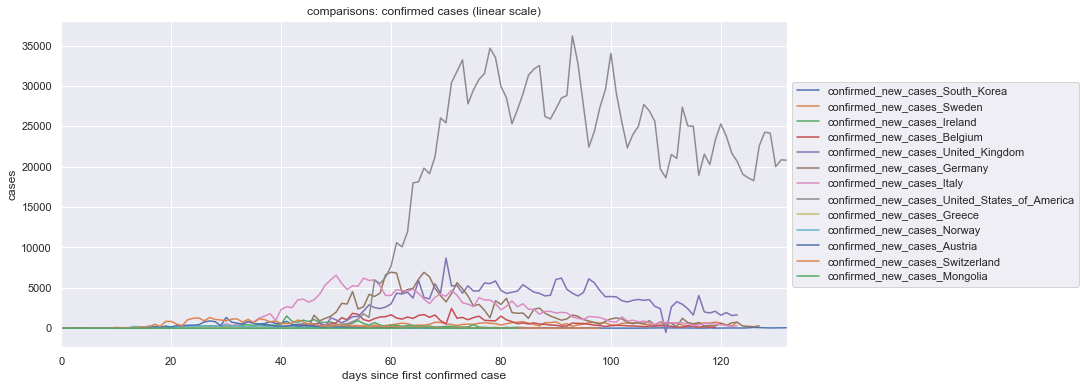

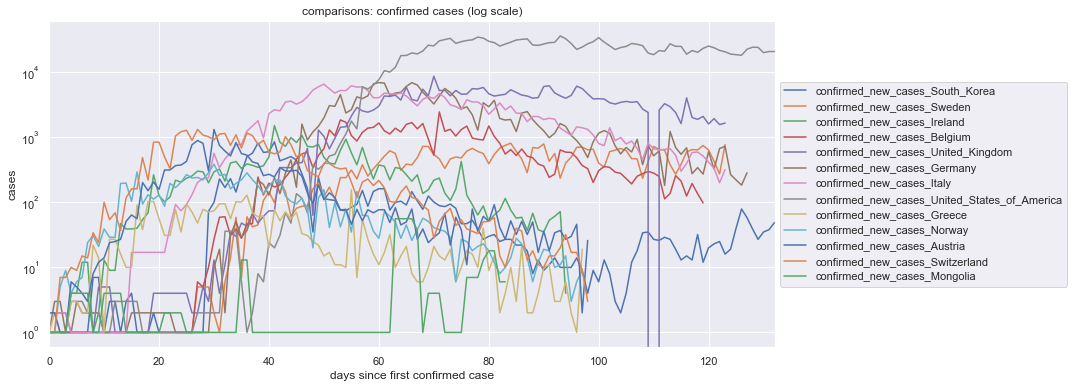

In [25]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland',
    'confirmed_new_cases_Mongolia']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

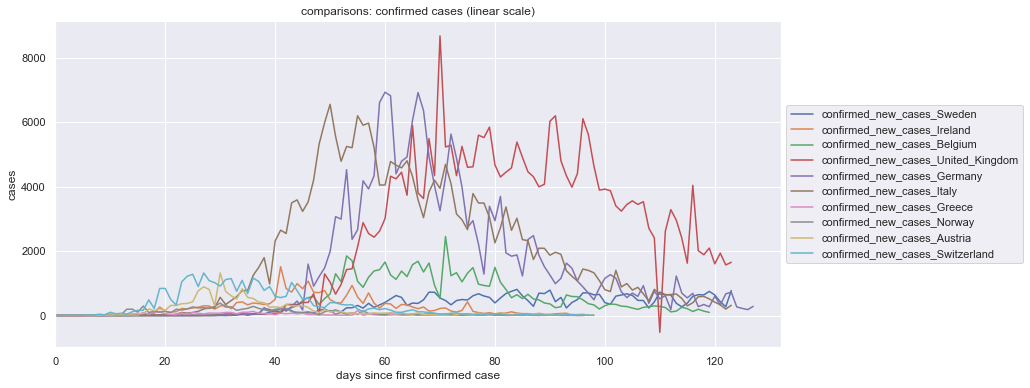

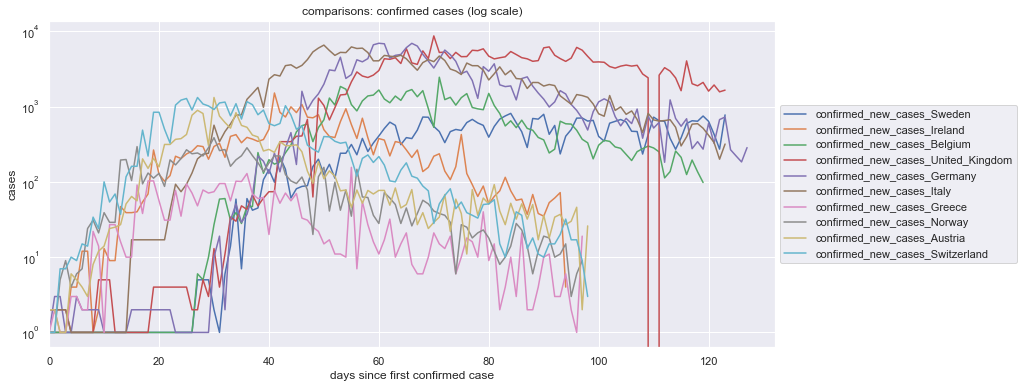

In [26]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
128                 269            NaN             NaN             NaN   
129                 270            NaN             NaN             NaN   
130                 271            NaN             NaN             NaN   
131                 272            NaN             NaN             NaN   
132                 273            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
128                    NaN             NaN           NaN   
129                    NaN             NaN           NaN   
130                    NaN             NaN           NaN   
131                    NaN             NaN           NaN   
132                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
128                           102809            NaN            NaN   
129                           103776            NaN            NaN   
130                           104381            NaN            NaN   
131                           105149            NaN            NaN   
132                           106180            NaN            NaN   

     deaths_Austria  deaths_Switzerland  deaths_Mongolia  
128             NaN                 NaN              NaN  
129             NaN                 NaN              NaN  
130             NaN                 NaN              NaN  
131             NaN                 NaN              NaN  
132             NaN                 NaN              NaN

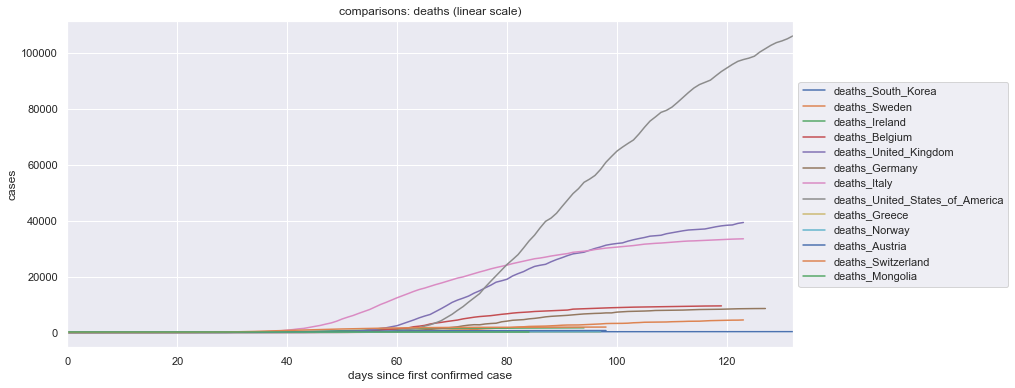

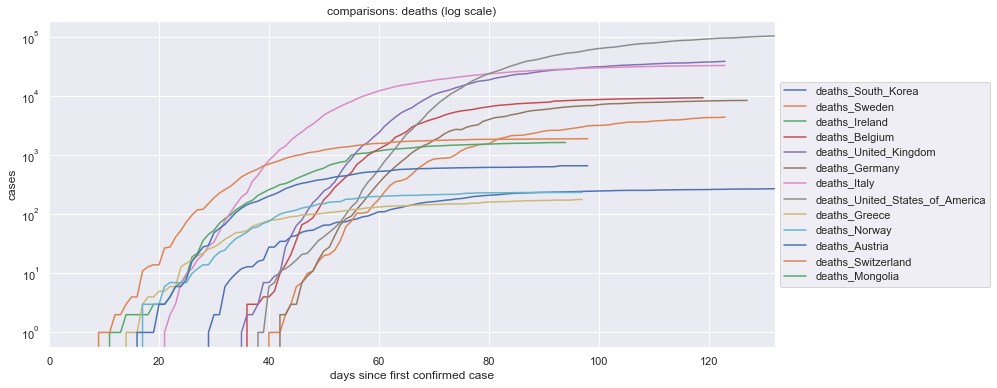

In [27]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland',
    'deaths_Mongolia']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
128            NaN             NaN             NaN                    NaN   
129            NaN             NaN             NaN                    NaN   
130            NaN             NaN             NaN                    NaN   
131            NaN             NaN             NaN                    NaN   
132            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
128             NaN           NaN            NaN            NaN   
129             NaN           NaN            NaN            NaN   
130             NaN           NaN            NaN            NaN   
131             NaN           NaN            NaN            NaN   
132             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
128             NaN                 NaN  
129             NaN                 NaN  
130             NaN                 NaN  
131             NaN                 NaN  
132             NaN                 NaN

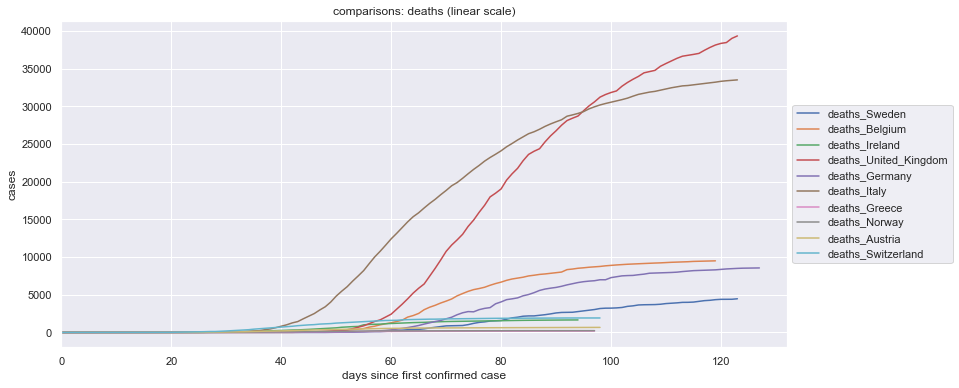

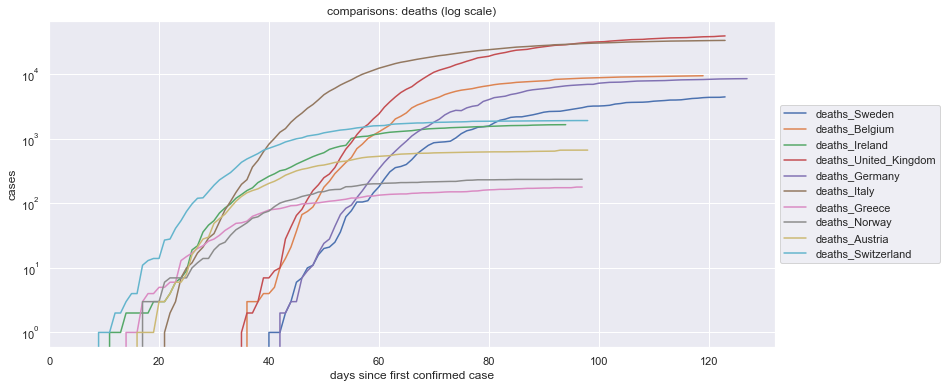

In [28]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
128                           1.0                      NaN   
129                           1.0                      NaN   
130                           1.0                      NaN   
131                           1.0                      NaN   
132                           1.0                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
128                       NaN                       NaN   
129                       NaN                       NaN   
130                       NaN                       NaN   
131                       NaN                       NaN   
132                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
128                              NaN                       NaN   
129                              NaN                       NaN   
130                              NaN                       NaN   
131                              NaN                       NaN   
132                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
128                     NaN                                     1193.0   
129                     NaN                                      967.0   
130                     NaN                                      605.0   
131                     NaN                                      768.0   
132                     NaN                                     1031.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
128                      NaN                      NaN   
129                      NaN                      NaN   
130                      NaN                      NaN   
131                      NaN                      NaN   
132                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  \
128                       NaN                           NaN   
129                       NaN                           NaN   
130                       NaN                           NaN   
131                       NaN                           NaN   
132                       NaN                           NaN   

     deaths_new_cases_Mongolia  
128                        NaN  
129                        NaN  
130                        NaN  
131                        NaN  
132                        NaN

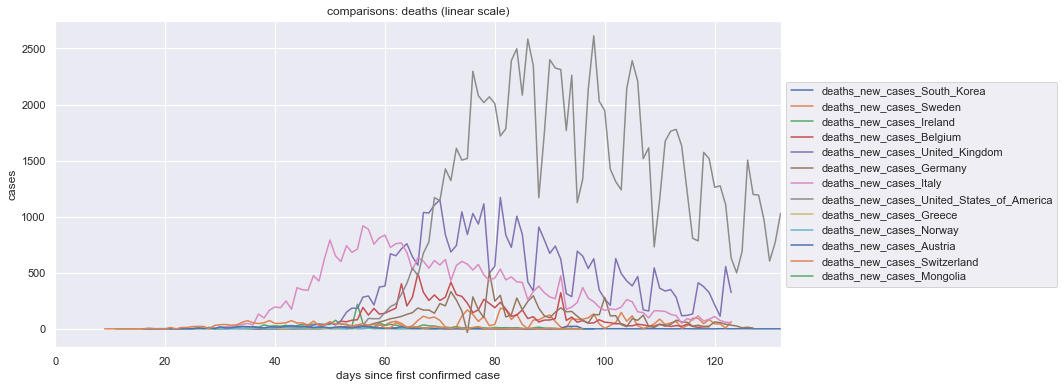

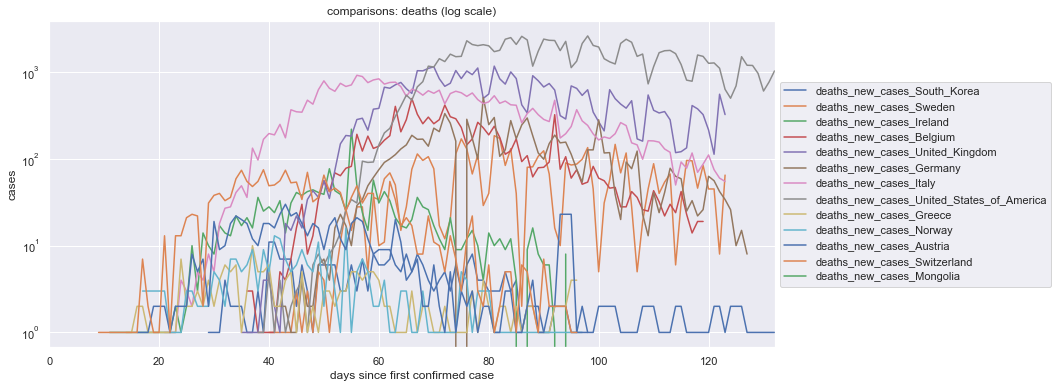

In [29]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland',
    'deaths_new_cases_Mongolia']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
128                      NaN                       NaN   
129                      NaN                       NaN   
130                      NaN                       NaN   
131                      NaN                       NaN   
132                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
128                       NaN                              NaN   
129                       NaN                              NaN   
130                       NaN                              NaN   
131                       NaN                              NaN   
132                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
128                       NaN                     NaN   
129                       NaN                     NaN   
130                       NaN                     NaN   
131                       NaN                     NaN   
132                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
128                      NaN                      NaN   
129                      NaN                      NaN   
130                      NaN                      NaN   
131                      NaN                      NaN   
132                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
128                       NaN                           NaN  
129                       NaN                           NaN  
130                       NaN                           NaN  
131                       NaN                           NaN  
132                       NaN                           NaN

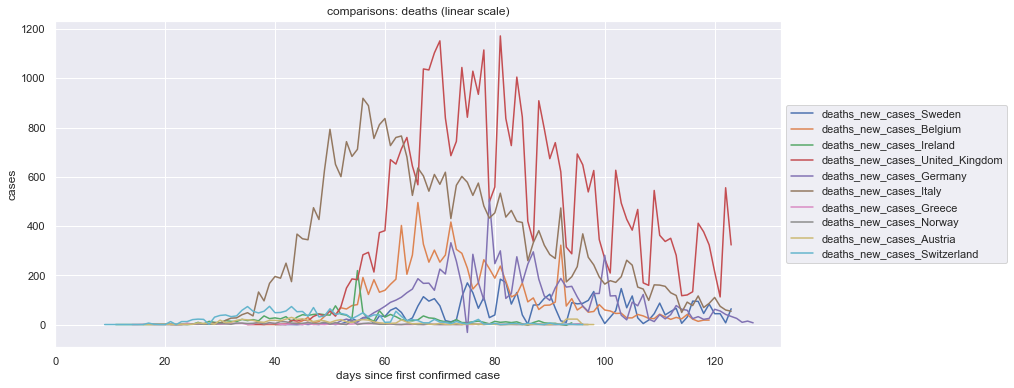

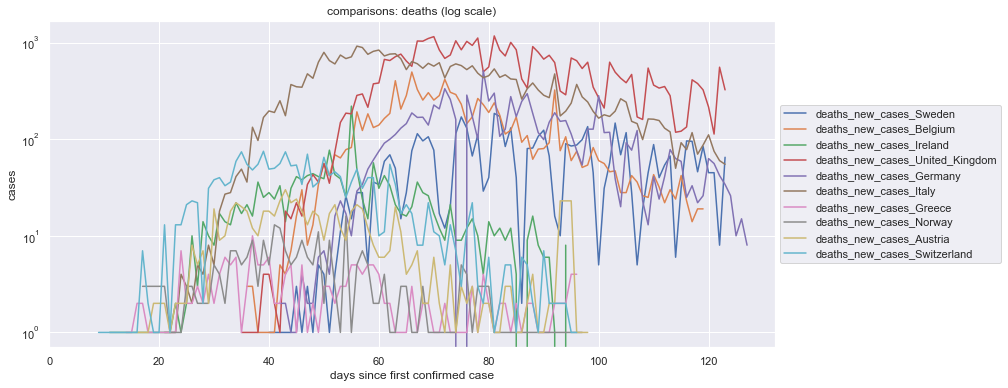

In [30]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
128                                 0.342045   
129                                 0.235993   
130                                 0.305197   
131                                 0.330349   
132                                 0.424573   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
128                                 NaN                                  NaN   
129                                 NaN                                  NaN   
130                                 NaN                                  NaN   
131                                 NaN                                  NaN   
132                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
128                                  NaN   
129                                  NaN   
130                                  NaN   
131                                  NaN   
132                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
128                                         NaN   
129                                         NaN   
130                                         NaN   
131                                         NaN   
132                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
128                                  NaN                                NaN   
129                                  NaN                                NaN   
130                                  NaN                                NaN   
131                                  NaN                                NaN   
132                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
128                                           1.409378      
129                                           1.382917      
130                                           1.130234      
131                                           1.164581      
132                                           1.148579      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
128                                 NaN                                 NaN   
129                                 NaN                                 NaN   
130                                 NaN                                 NaN   
131                                 NaN                                 NaN   
132                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
128                                  NaN   
129                                  NaN   
130                                  NaN   
131                                  NaN   
132                                  NaN   

     confirmed_percentage_change_Switzerland  \
128                                      NaN   
129                                      NaN   
130                                      NaN   
131                                      NaN   
132                                      NaN   

     confirmed_percentage_change_Mongolia  
128                                   NaN  
129                                   NaN  
130                                   NaN  
131                                   NaN  
132                                   NaN

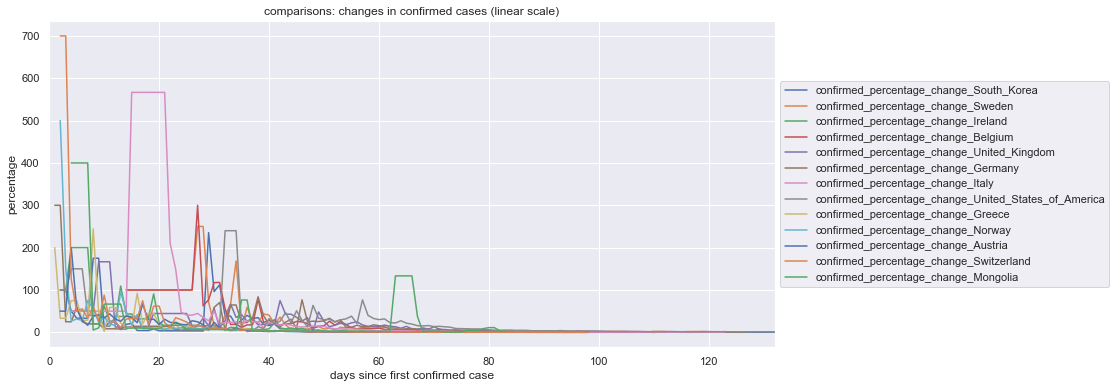

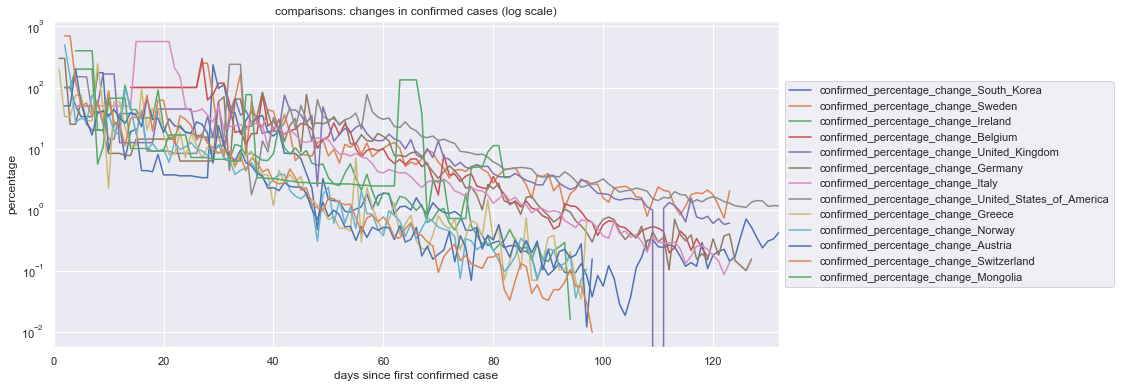

In [31]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland',
    'confirmed_percentage_change_Mongolia']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
128                              0.371747                              NaN   
129                              0.371747                              NaN   
130                              0.370370                              NaN   
131                              0.369004                              NaN   
132                              0.367647                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
128                               NaN                               NaN   
129                               NaN                               NaN   
130                               NaN                               NaN   
131                               NaN                               NaN   
132                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
128                                      NaN   
129                                      NaN   
130                                      NaN   
131                                      NaN   
132                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
128                               NaN                             NaN   
129                               NaN                             NaN   
130                               NaN                             NaN   
131                               NaN                             NaN   
132                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
128                                           1.174028   
129                                           0.940579   
130                                           0.582986   
131                                           0.735766   
132                                           0.980513   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
128                              NaN                              NaN   
129                              NaN                              NaN   
130                              NaN                              NaN   
131                              NaN                              NaN   
132                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  \
128                               NaN                                   NaN   
129                               NaN                                   NaN   
130                               NaN                                   NaN   
131                               NaN                                   NaN   
132                               NaN                                   NaN   

     deaths_percentage_change_Mongolia  
128                                NaN  
129                                NaN  
130                                NaN  
131                                NaN  
132                                NaN

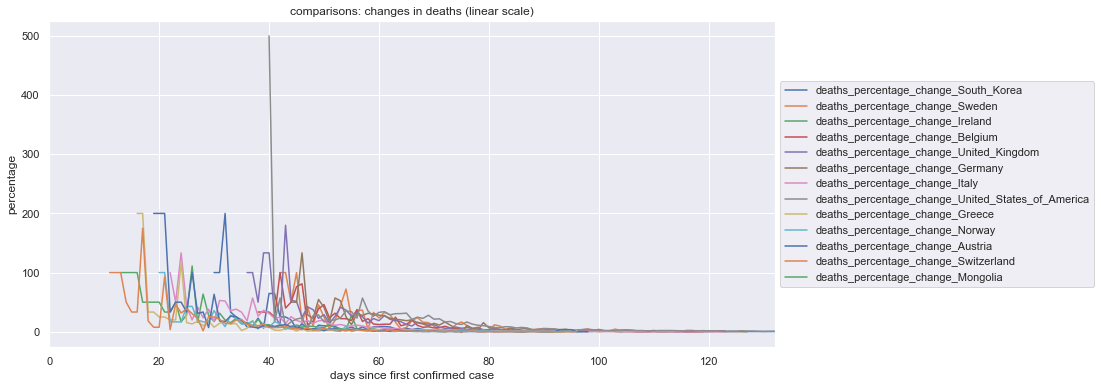

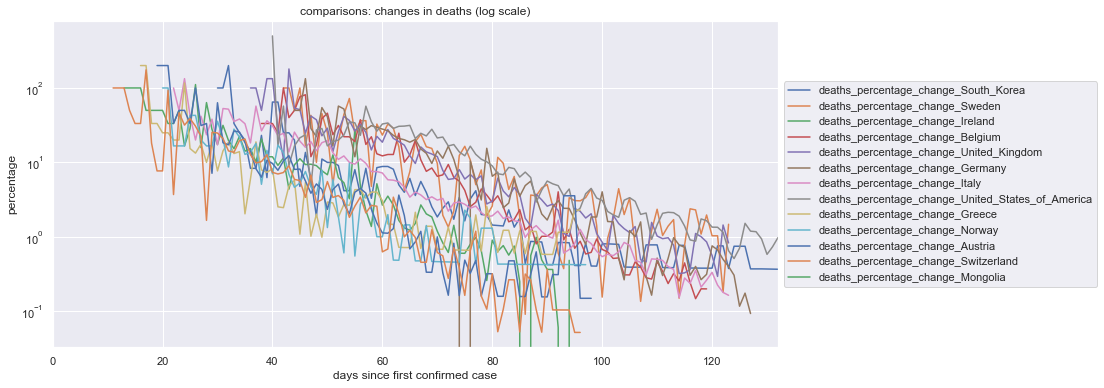

In [32]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland',
    'deaths_percentage_change_Mongolia']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
128                              NaN                               NaN   
129                              NaN                               NaN   
130                              NaN                               NaN   
131                              NaN                               NaN   
132                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
128                               NaN   
129                               NaN   
130                               NaN   
131                               NaN   
132                               NaN   

     deaths_percentage_change_United_Kingdom  \
128                                      NaN   
129                                      NaN   
130                                      NaN   
131                                      NaN   
132                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
128                               NaN                             NaN   
129                               NaN                             NaN   
130                               NaN                             NaN   
131                               NaN                             NaN   
132                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
128                              NaN                              NaN   
129                              NaN                              NaN   
130                              NaN                              NaN   
131                              NaN                              NaN   
132                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
128                               NaN                                   NaN  
129                               NaN                                   NaN  
130                               NaN                                   NaN  
131                               NaN                                   NaN  
132                               NaN                                   NaN

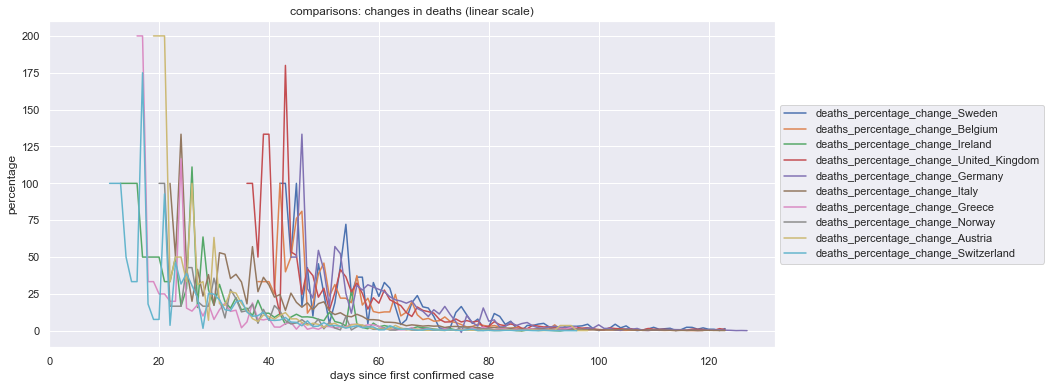

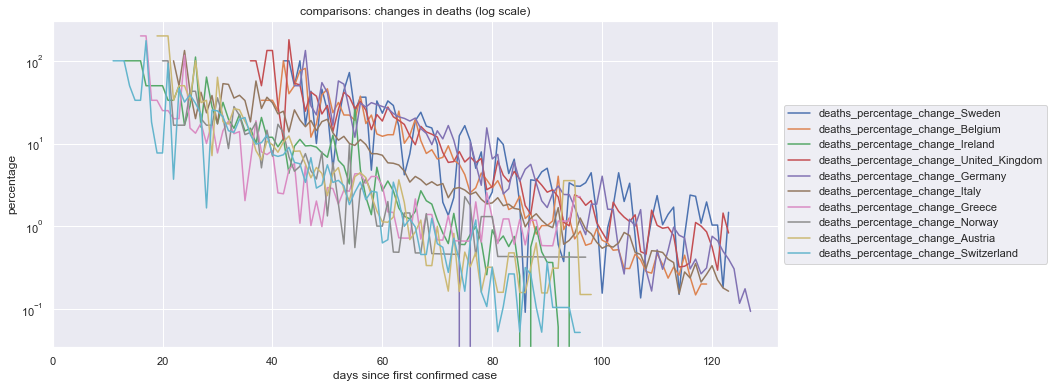

In [33]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');